# Assignment 3

The assignment 3 contains 1 question and the due date is April 28th (Sunday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 How Yelp Uses Deep Learning to Classify Business Photos? (100 points)

Yelp hosts tens of millions of photos uploaded by Yelpers from all around the world. The wide variety of these photos provides a rich window into local businesses, a window we’re only just peeking through today.

One way we’re trying to open that window is by developing a photo understanding system which allows us to create semantic data about individual photographs. The data generated by the system has been powering our recent launch of tabbed photo browsing as well as our first attempts at content-based photo diversification.

You can check more details about Yelp's practices at [here](https://engineeringblog.yelp.com/2015/10/how-we-use-deep-learning-to-classify-business-photos-at-yelp.html)


![food](https://engineeringblog.yelp.com/images/posts/2015-10-14-photo-classification/image02.png)


In this question, you will be asked to building a Photo Classifier.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from PIL import Image
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's first upload the file images.npy and labels.npy and load the images dataset.

In [3]:
images = np.load('images.npy') # SHAPE: (1024, 256, 256, 3) -> (N_SAMPLES, HEIGHT, WIDTH, CHANNELS)
labels = np.load('labels.npy') # SHAPE: (1024,) -> (N_SAMPLES,). Label encoded: 0, 1, 2, 3

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print('Labels match the image at the respective 0 to 1024 position.')

Images shape: (1024, 256, 256, 3)
Labels shape: (1024,)
Labels match the image at the respective 0 to 1024 position.


There are four types of the images on Yelp: Food, Drink, Interior and Exterior

In [ ]:
np.unique(labels)

array([0, 1, 2, 3])

We visualize some random images from the dataset below:

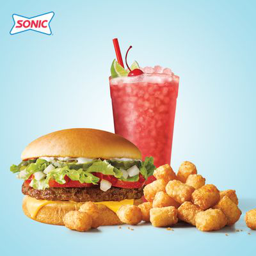

In [ ]:
# food: class 0

Image.fromarray(images[5])

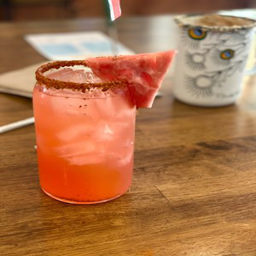

In [ ]:
# drink: class 1

Image.fromarray(images[3])

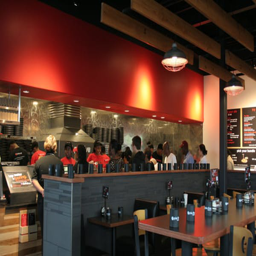

In [ ]:
# interior: class 2

Image.fromarray(images[7])

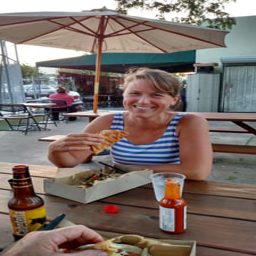

In [ ]:
# exterior: class 3

Image.fromarray(images[8])

### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the Yelp image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

In [4]:
# Standardize the data (only for the images)
images_scaled = images.astype('float32') / 255.0


# Define train, test sets (interpreted from the question that the test set is also used as validation during training, so no need to define a seperate validation set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_scaled, labels, test_size=0.2, random_state=42)

In [8]:
# Model Definition (20 hidden layers, 100 neurons each, RELU activation function)
number_dense_layers = 20
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    model.add(keras.layers.Dense(100, activation="relu"))

# Output layer (for possible classes)
model.add(keras.layers.Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 100)               19660900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [9]:
# Adam optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
# 100 epochs
max_epochs = 100
history = model.fit(X_train, y_train, epochs=max_epochs,
                    validation_data=(X_test, y_test))

Epoch 1/100
26/26 [==============================] - 6s 110ms/step - loss: 1.3827 - accuracy: 0.2576 - val_loss: 1.3761 - val_accuracy: 0.2488
Epoch 2/100
26/26 [==============================] - 2s 93ms/step - loss: 1.3501 - accuracy: 0.3346 - val_loss: 1.3814 - val_accuracy: 0.3268
Epoch 3/100
26/26 [==============================] - 2s 92ms/step - loss: 1.2953 - accuracy: 0.3895 - val_loss: 1.3341 - val_accuracy: 0.3805
Epoch 4/100
26/26 [==============================] - 2s 92ms/step - loss: 1.2837 - accuracy: 0.3736 - val_loss: 1.3513 - val_accuracy: 0.3268
Epoch 5/100
26/26 [==============================] - 2s 89ms/step - loss: 1.1790 - accuracy: 0.4322 - val_loss: 1.2991 - val_accuracy: 0.3902
Epoch 6/100
26/26 [==============================] - 2s 89ms/step - loss: 1.1745 - accuracy: 0.4762 - val_loss: 1.2512 - val_accuracy: 0.4293
Epoch 7/100
26/26 [==============================] - 2s 88ms/step - loss: 1.1394 - accuracy: 0.4774 - val_loss: 1.2915 - val_accuracy: 0.4098
Epoch

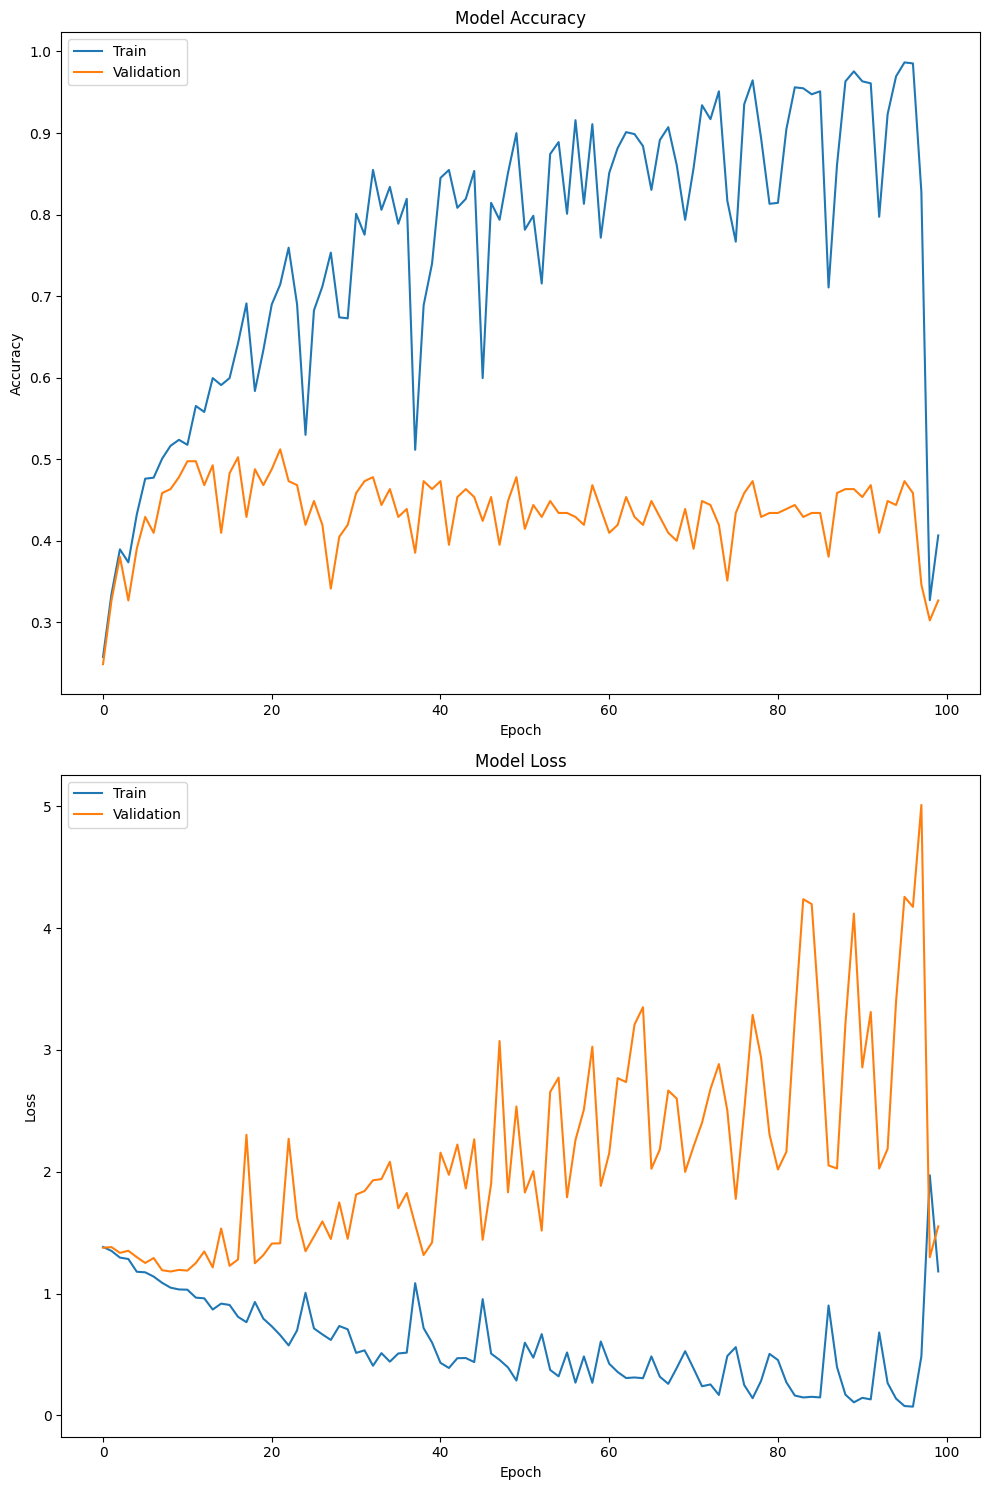

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 15))
# training and validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train')
axs[0].plot(history.history['val_accuracy'], label='Validation')
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(loc='upper left')

# training and validation loss values
axs[1].plot(history.history['loss'], label='Train')
axs[1].plot(history.history['val_loss'], label='Validation')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

The final model has 19,853,204 parameters. This is because we are using the whole images as inputs, and since each image is 256 by 256 pixels and has 3 channels for rbg values, the parameters number quickly gets very large (256x256x3 = 196,608). In the dense layers, because each layer has 100 neurons, we add 19,660,900 in the first dense layer (196,608 * 100 + 100 or input_layer_size * neurons + neurons_bias_terms), and in the other layers we add 10,100 in each layer (first layer outputs shape None, 100; so applying the same formula, 100 * 100 + 100 = 10,100). Finally, in the output layer, since we have 4 possible classifications, we have 4 neurons, and so we add 404 parameters (100 * 4 + 4).

Due to the large number of parameters that we have, the final model is most likely too complex. Since we are using the raw images as the input, the model likely captures a lot of noise and outliers (i.e. irrelevant variations). The large number of parameters causes the model to have great memory capacity, which is used to capture the images themselves instead of the relationships that lead to accurate classification. Therefore, our models outputs won't have good generalization, so we would that as the model trains, while the performance for the training set increases, the performance for the validation set will no improve (either decreasing or fluctuating arround the initial values).

By the end of hte training process, training accuracy had increased from 29% to 93% and loss decreased from 1.38 to 0.24, while validation accuracy went from 24% to 38% and loss from 1.38 to 2.42.

Looking at the plots, we got the expected results from the train, as in each epoch the model predicts better and better, greatly reducing loss and increasing accuracy; and  the validation set results show that there is little effect on the accuracy and loss, as the model is fitted to the training data. This shows that the model is overfitted to the training data, and doesn't generalize well enough to have good performance in the validation set.

### Question 1.2 (25 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture.

---
In general, when testing each technique, we first test the technique with some variations of the hyperparameters. These variations will be chosen manually, based on what is typical for deep learning models applied to images (Grid Search or Random Search could be applied to cover a wider combinations of parameters, but the long time it would take to train would not be practical). The variation with the best result is then plotted against the benchmark, and if the technique shows that it reduces overfitting, we add it to the model, after testing it in combination with previously added techniques. Finally, it is assumed that improvement is based on the accuracy value. The techniques we will test are:


Weight Regularization: Another way of simplifying the model, since reducing the number of parameters significantly is would require methods used for the next questions, is weight regularization. With weight regularization, we modify the way training process arrives at the models parameters (or weights), by adding a loss term to the regression that computes the weight (which can help with overfitting). There are two ways of doing weight regularization - L1 Regularization (Lasso Regression), where the weights are penalized in proportion to the sum of the absolute values of the weights, which drives irrelevant features to exactly 0 (increases model sparsity); and L2 Regularization (Ridge Regression), where the loss added is equal to the some of the squares of the weights, which drives irrelevant features close to zero but does not remove them from the model.

Early Stopping: Early stopping, as the name suggests, interrupts the training process when the model starts to overfit. This is done by monitoring the performance of the model on the validation set, and stopping the training process when the performance starts to decrease. Since in the initial model, the validation performance did not increase much as we trained the model, it is not expected to solve our problem, it still may produce results in combination with other techniques.

Dropout: Dropout randomly sets a fraction of the input units to 0 at each update during training time, which helps prevent overfitting. This is because the model is forced to learn redundant representations, which makes it more robust and generalizes better. We will use dropout in the dense layers of the model.

Batch Normalization: Batch normalization normalizes the input of each layer, which helps with the vanishing gradient problem and allows for higher learning rates. This technique is used to speed up the training process and reduce the need for other techniques like dropout. We will use batch normalization in the dense layers of the model, as an alternative for dropout (it is expected that only one would be added to the pipeline)

---
Results:

Weight Regularization: Both L1 and L2 failed to produce better results, so they were not added to the model. The best regularization was L1 regularization, with a multiplier of 0.001, and model accuracy decreased 16%

Early Stopping: Patience levels were tested as percentage of the training epochs. Setting patience to 20% achieved slightly better results, with an improvement of the validation accuracy of arround 13.65%, with the other patience levels tried also achieving positive results. Early Stopping at 20% (20 epochs) patience level was therefore added to the pipeline.

Dropout: Achieved very poor results with all combinations tried, with the best performing hyperparameter actually making the model worse, also with a loss in accuracy of 16%.

Batch Normalization: Achived very good results, although it takes longer to train due to added complexity. Applied alone, Bath Normalization improved accuracy by nearly 20%. However, together, with Early Stopping, accuracy only increased 13.65% (same as Early Stopping invidually). This is likely because Batch Normalization's improvements take while to take effect in the training process, and so Early Stopping is stopping too soon.

Due to the combination of Batch Normalization and Early Stopping not working so well, the final pipeline will only have Batch Normalization. Still, we were able to improve accruacy by 20%, so we were still successful in reducing the overfitting problem. In the  future, we could try more techniques and more combinations of Early Stopping and Batch Normalization, as there is room for improvement.

In [12]:
# Store the training logs in a dictionary from the  model above, to use as a baseline for comparison
histories = {}
histories['baseline'] = history

In [7]:
# Function to compile and fit models

def compile_and_fit(model, callback=None):
    """
    Compile and fit the model, using adam optimizer, accuracy metric, 100 epochs,
    and X_test and y_test has validation (similar to the previous baseline)
    """

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.summary()

    history = model.fit(
        X_train, y_train,
        epochs=max_epochs,
        validation_data=(X_test, y_test),
        callbacks=callback)

    return history

# Function to plot the training and validation accuracy and loss

def plot_history(history, color, label):
    """
    Plot the training and validation accuracy and loss
    """
    axs[0].plot(history.history['accuracy'], label='Train_{}'.format(label), color=color)
    axs[0].plot(history.history['val_accuracy'], label='Validation', color=color, linestyle='dashed')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(loc='upper left')

    axs[1].plot(history.history['loss'], label='Train_{}'.format(label), color=color)
    axs[1].plot(history.history['val_loss'], label='Validation_{}'.format(label), color=color, linestyle='dashed')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='upper left')

# Function to calculate improvement (based on accuracy)

def calculate_improvement(history, baseline):
    """
    Calculate the improvement of the model based on the accuracy
    """
    improvement = (history.history['val_accuracy'][-1] - baseline.history['val_accuracy'][-1]) * 100
    return improvement

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               19660900  
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)              

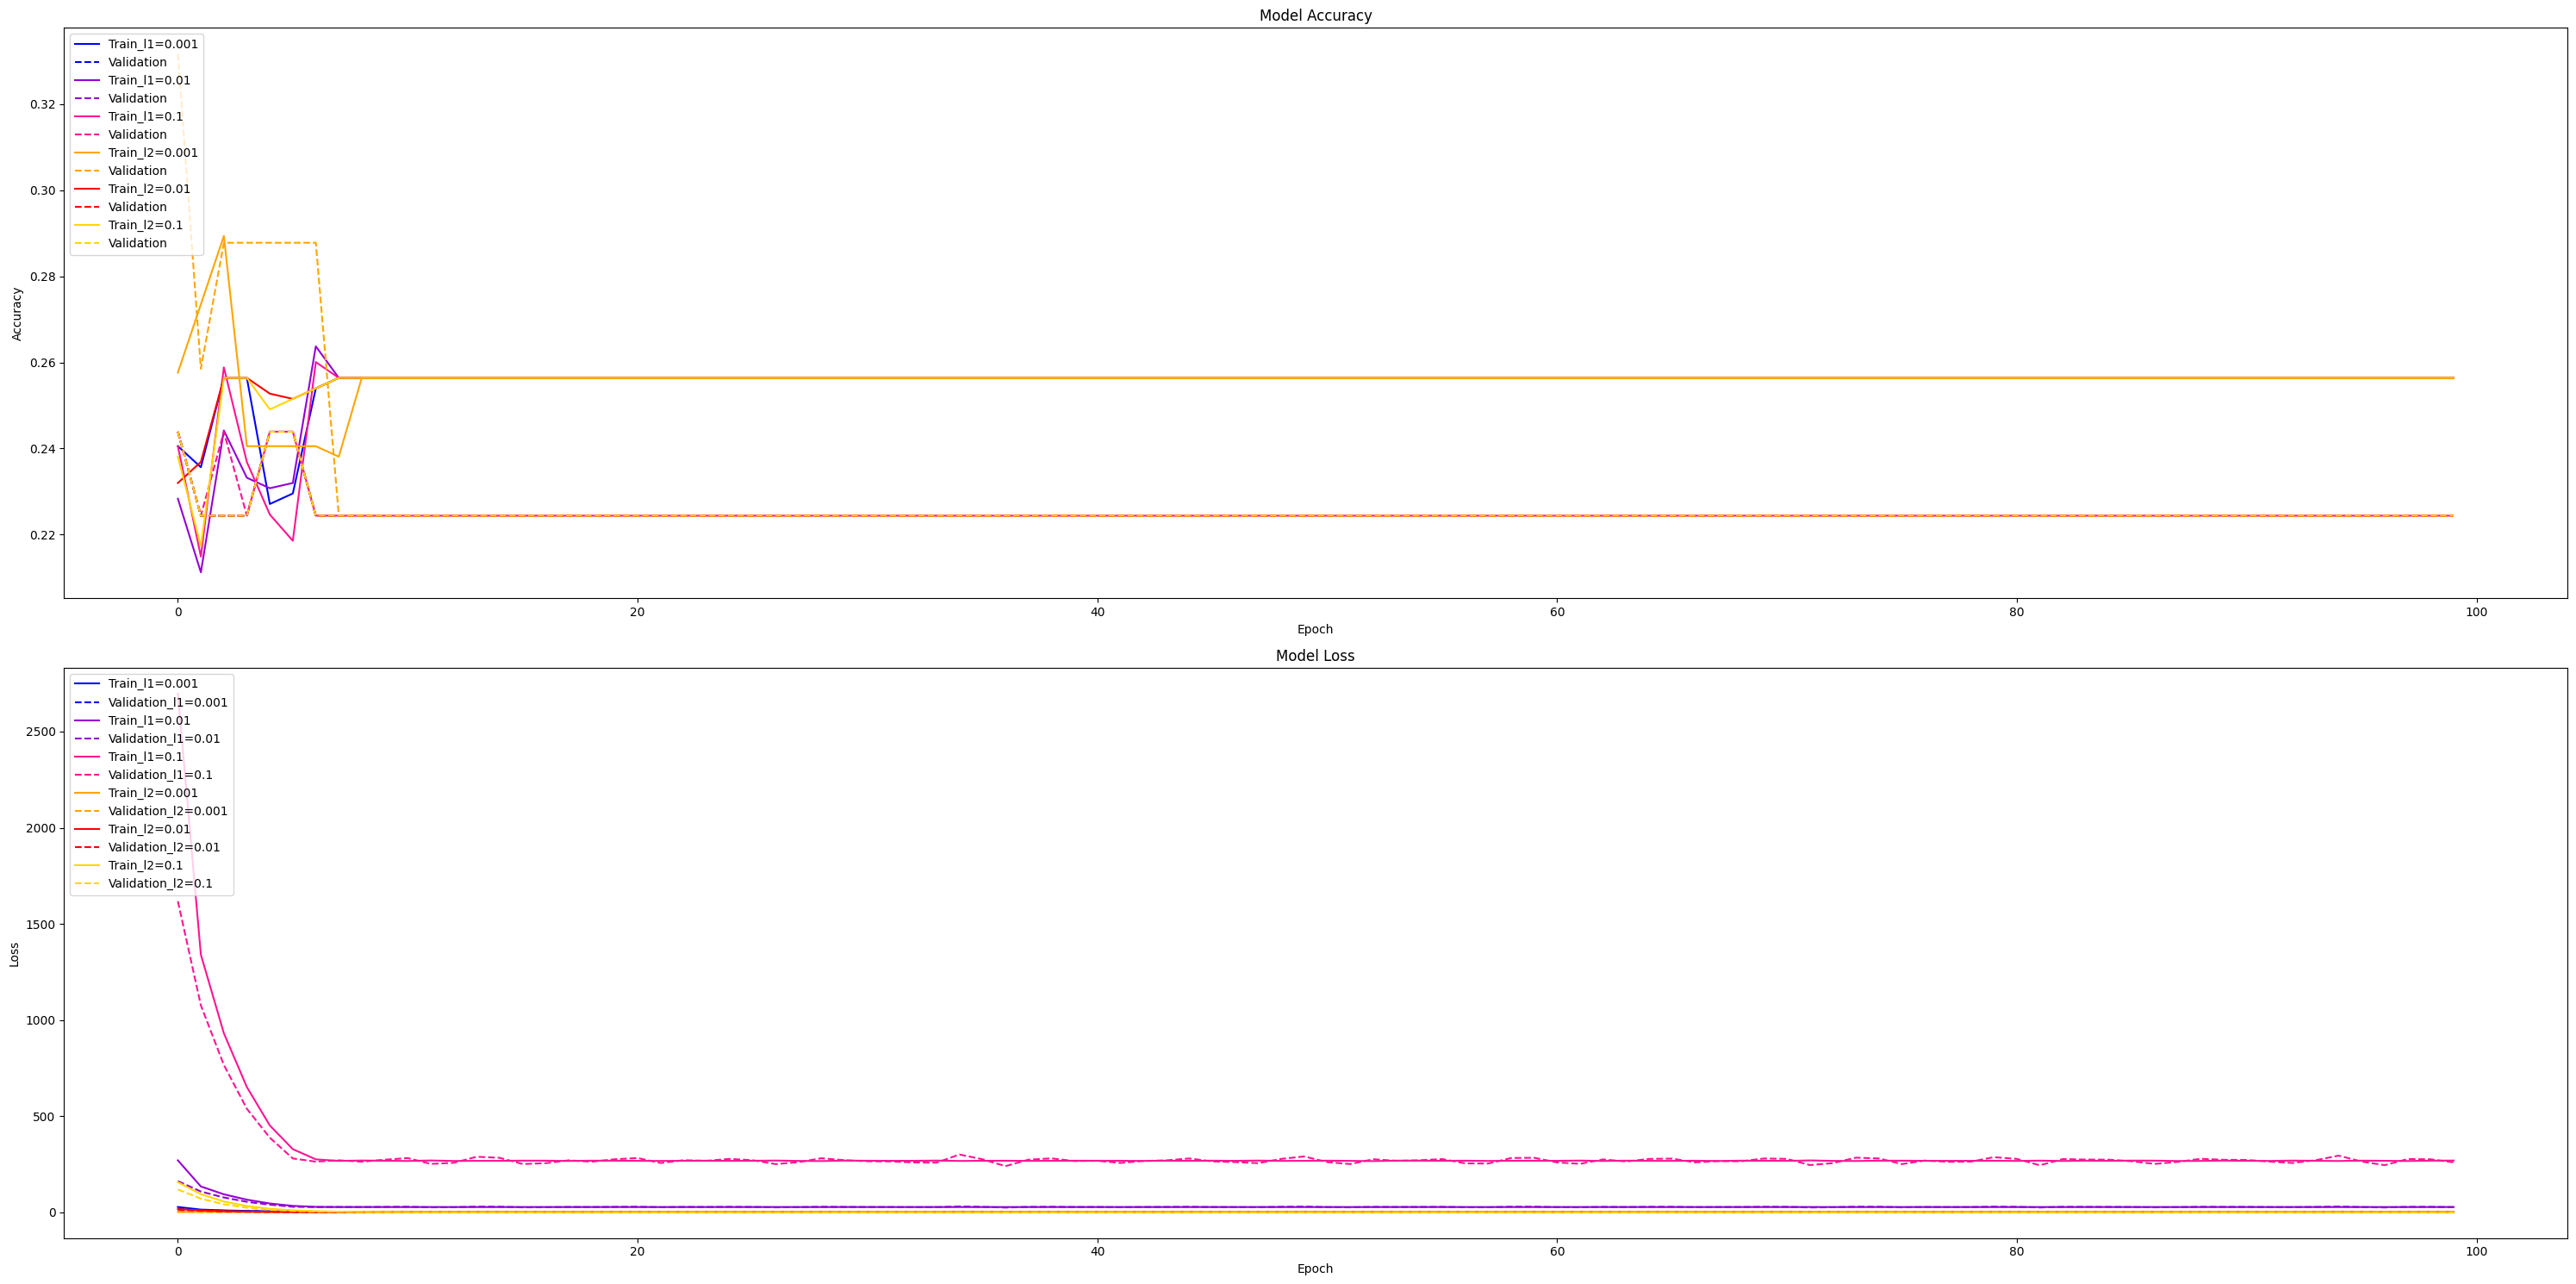

In [ ]:
# Weight Regularization - L1
# l1=0.001

history_regularization = {}
fig, axs = plt.subplots(2, 1, figsize=(30, 15))

l1_model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l1_model_1.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l1(0.001)))

l1_model_1.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l1_model_1)
history_regularization['l1=0.001'] = history

plot_history(history, 'blue', 'l1=0.001')

# l1=0.01

l1_model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l1_model_2.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l1(0.01)))

l1_model_2.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l1_model_2)
history_regularization['l1=0.01'] = history

plot_history(history, 'darkviolet', 'l1=0.01')

# l1=0.1

l1_model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l1_model_3.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l1(0.1)))

l1_model_3.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l1_model_3)
history_regularization['l1=0.1'] = history

plot_history(history, 'deeppink', 'l1=0.1')

# Weight Regularization - L2
# l2=0.001

l2_model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l2_model_1.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l2(0.001)))

l2_model_1.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l2_model_1)
history_regularization['l2=0.001'] = history

plot_history(history, 'orange', 'l2=0.001')

# l2=0.01

l2_model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l2_model_2.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l2(0.01)))

l2_model_2.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l2_model_2)
history_regularization['l2=0.01'] = history

plot_history(history, 'red', 'l2=0.01')

# l2=0.1

l2_model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l2_model_3.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l2(0.1)))

l2_model_3.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l2_model_3)
history_regularization['l2=0.1'] = history

plot_history(history, 'gold', 'l2=0.1')

plt.tight_layout()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 196608)            0         
                                                                 
 dense_147 (Dense)           (None, 100)               19660900  
                                                                 
 dense_148 (Dense)           (None, 100)               10100     
                                                                 
 dense_149 (Dense)           (None, 100)               10100     
                                                                 
 dense_150 (Dense)           (None, 100)               10100     
                                                                 
 dense_151 (Dense)           (None, 100)               10100     
                                                                 
 dense_152 (Dense)           (None, 100)              

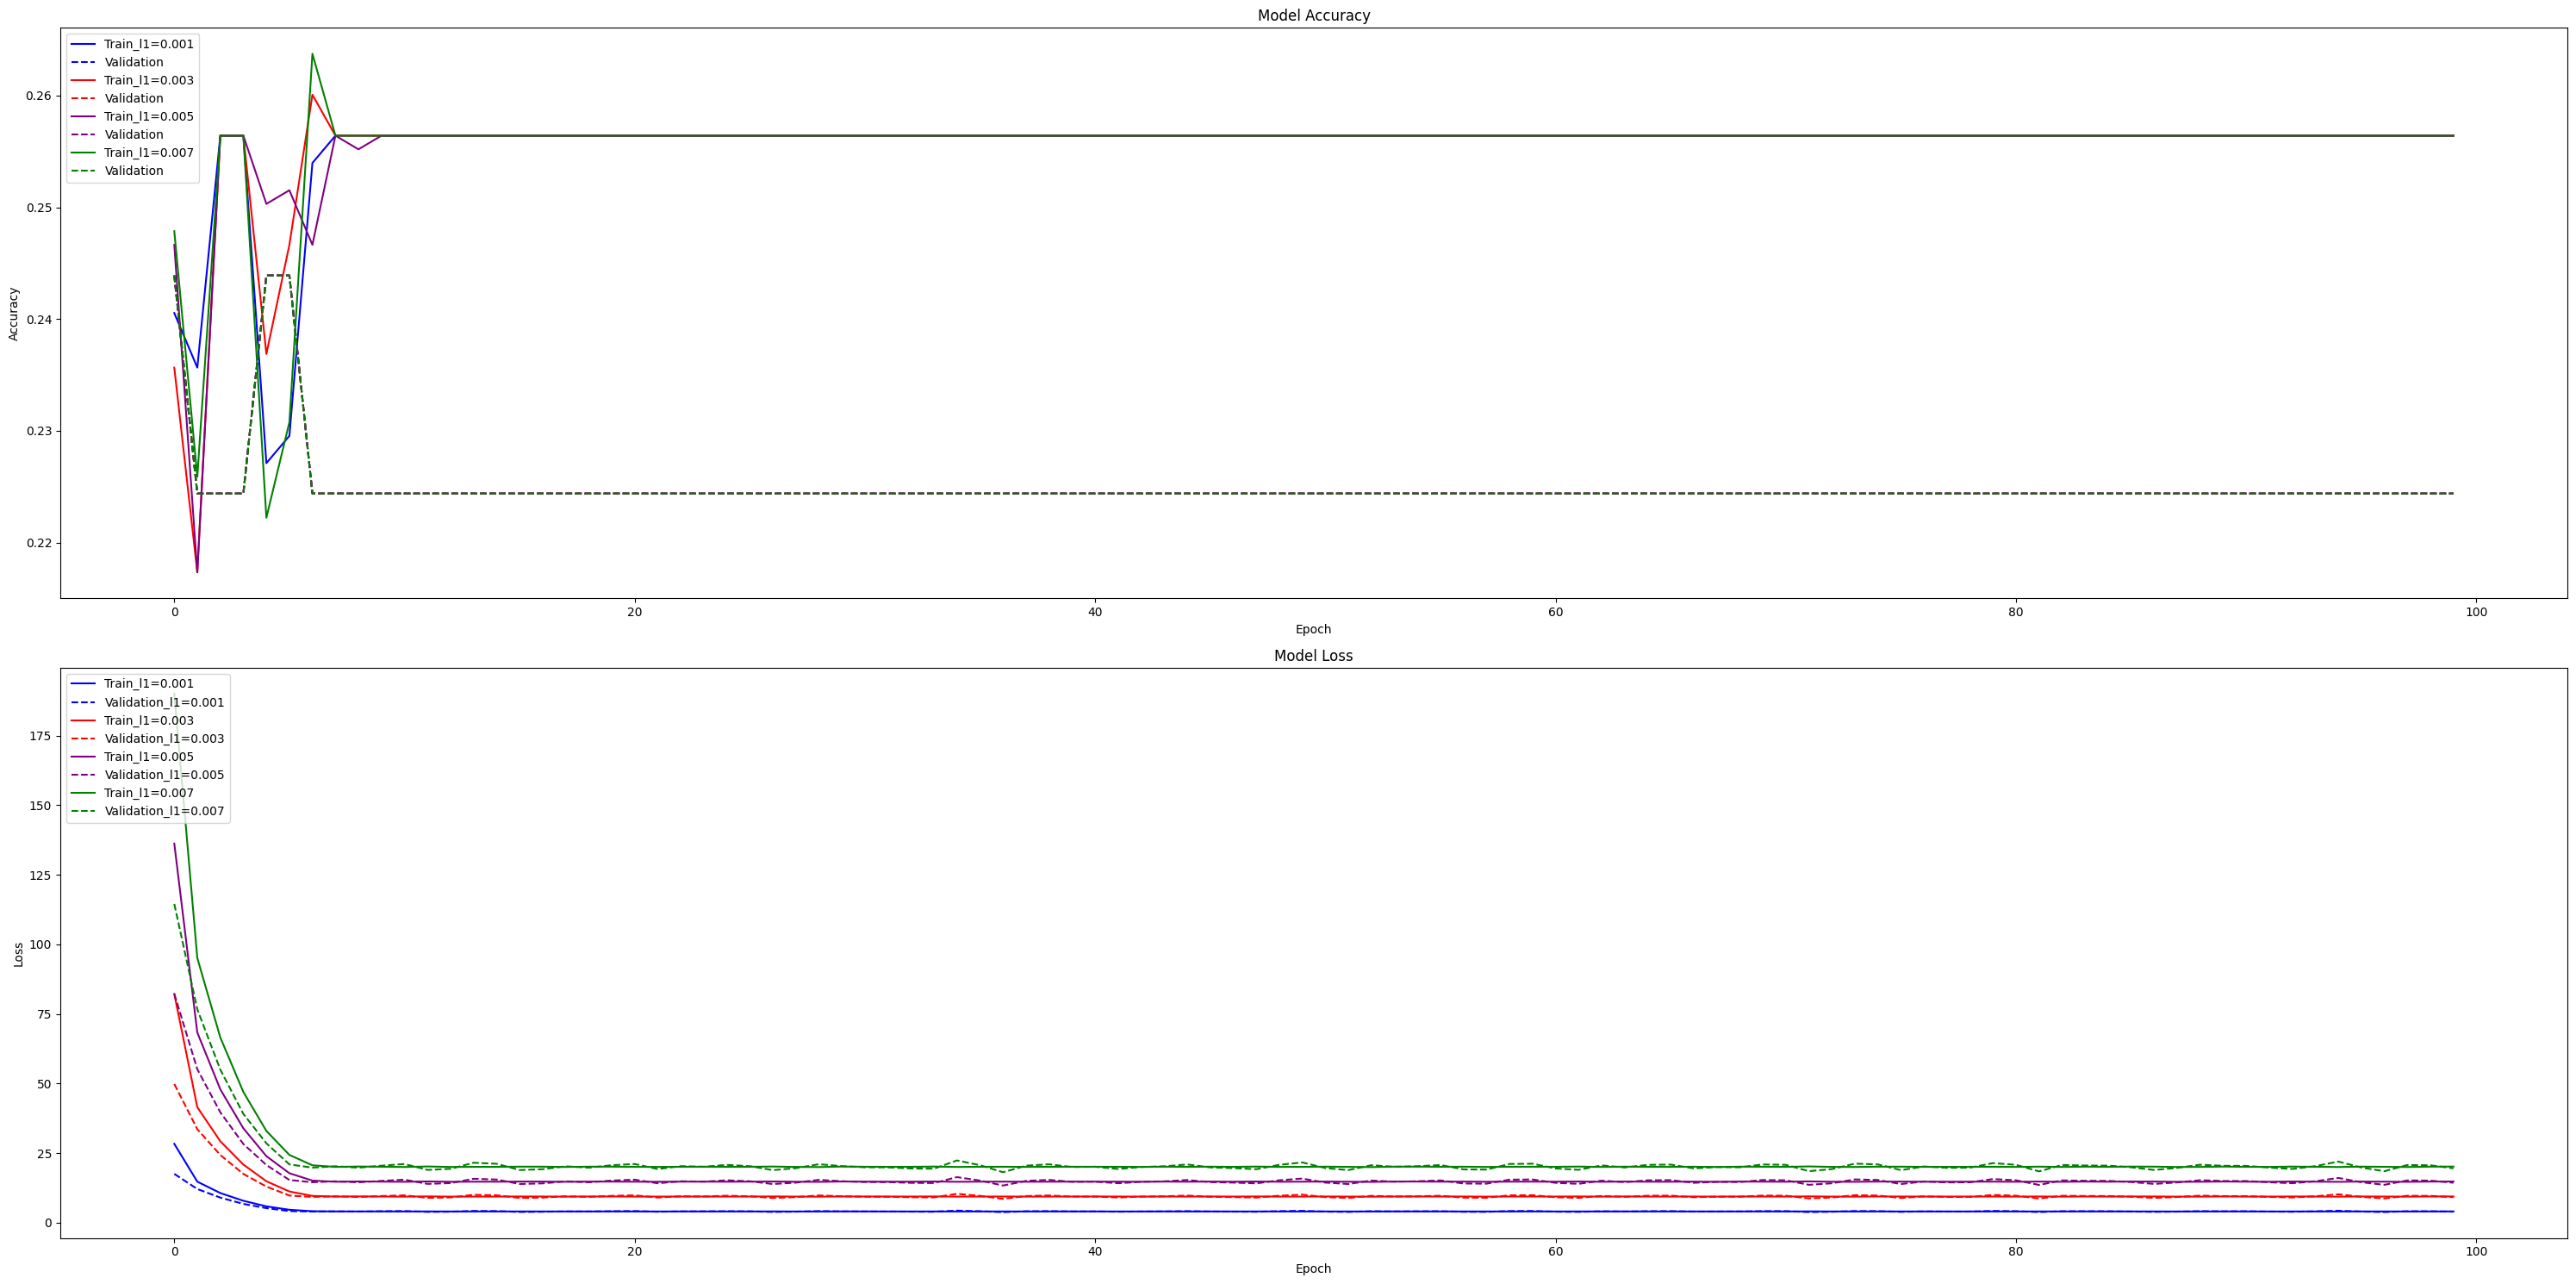

In [ ]:
# Weight Regularization - Further testing arround l1 0.001
# l1=0.003
fig, axs = plt.subplots(2, 1, figsize=(30, 15))
plot_history(history_regularization['l1=0.001'], 'blue', 'l1=0.001')

l1_model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l1_model_4.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l1(0.003)))

l1_model_4.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l1_model_4)
history_regularization['l1=0.003'] = history
plot_history(history, 'red', 'l1=0.003')

# l1=0.005

l1_model_5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l1_model_5.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l1(0.005)))

l1_model_5.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l1_model_5)
history_regularization['l1=0.005'] = history

plot_history(history, 'purple', 'l1=0.005')

# l1=0.007

l1_model_6 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    l1_model_6.add(
        keras.layers.Dense(100, activation="relu",
        kernel_regularizer=keras.regularizers.l1(0.007)))

l1_model_6.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(l1_model_6)
history_regularization['l1=0.007'] = history

plot_history(history, 'green', 'l1=0.007')

plt.tight_layout()
plt.show()

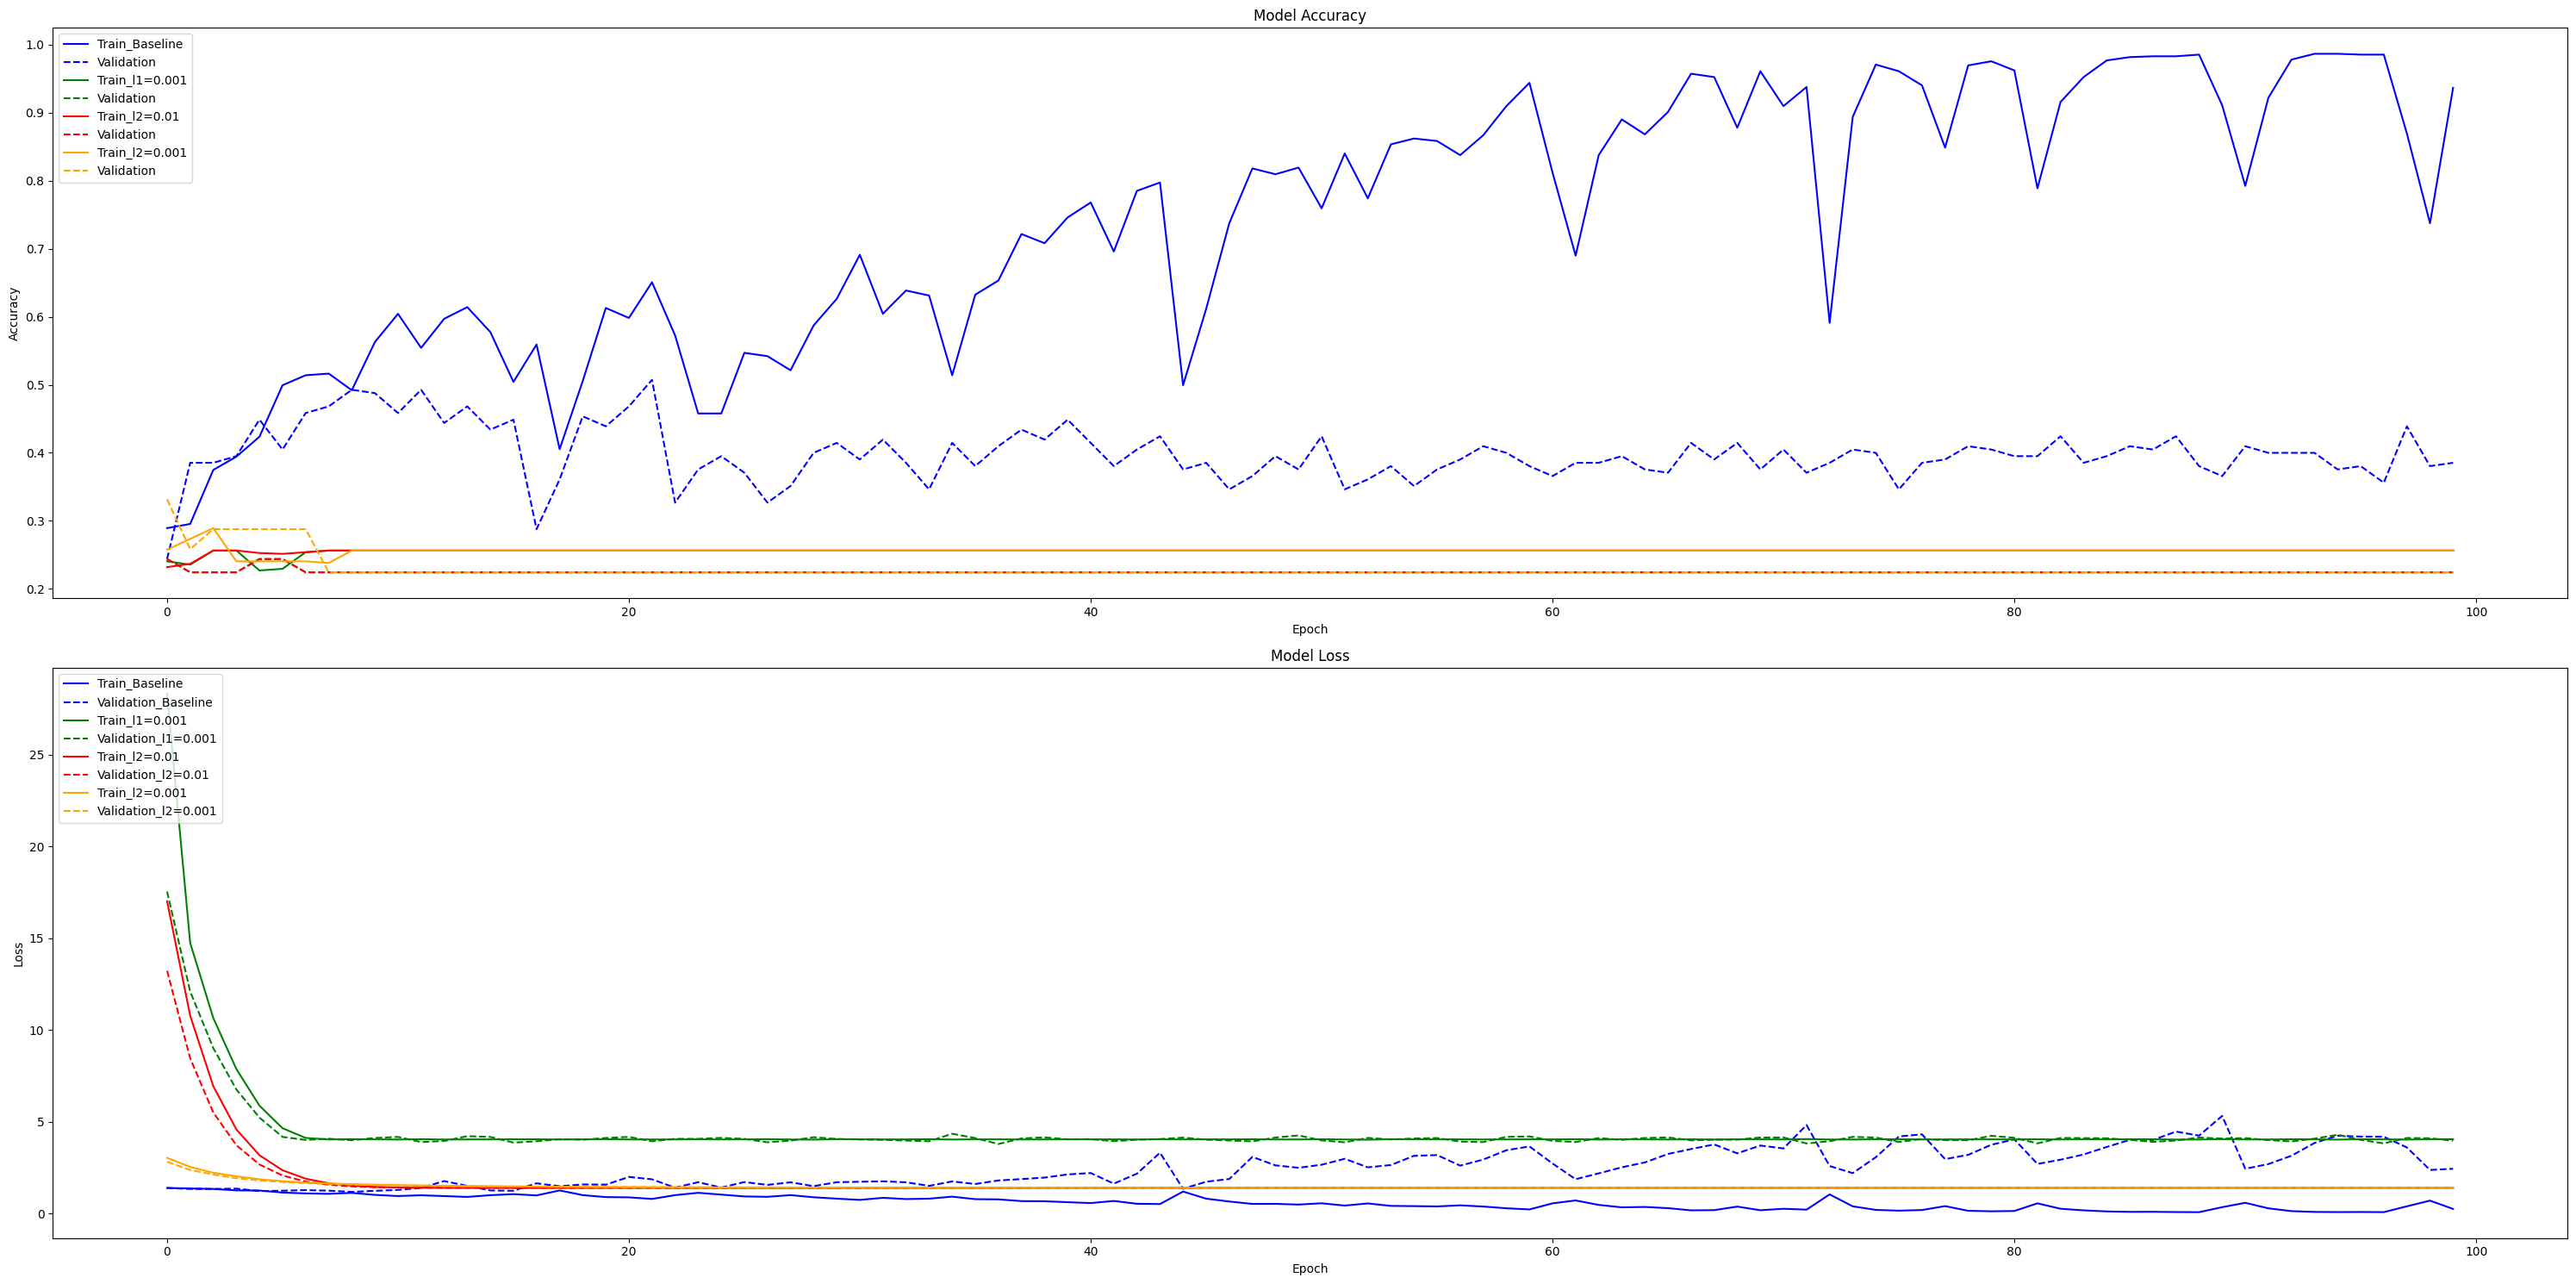

Improvement of l1=0.001 against the baseline: -16.09756052494049


In [ ]:
# Weight Regularization - best regularizations against the benchmark
fig, axs = plt.subplots(2, 1, figsize=(30, 15))

plot_history(histories['baseline'], 'blue', 'Baseline')
plot_history(history_regularization['l1=0.001'], 'green', 'l1=0.001')
plot_history(history_regularization['l2=0.01'], 'red', 'l2=0.01')
plot_history(history_regularization['l2=0.001'], 'orange', 'l2=0.001')

plt.tight_layout()
plt.show()

print("Improvement of l1=0.001 against the baseline:", calculate_improvement(history_regularization['l1=0.001'], histories['baseline']))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               19660900  
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)              

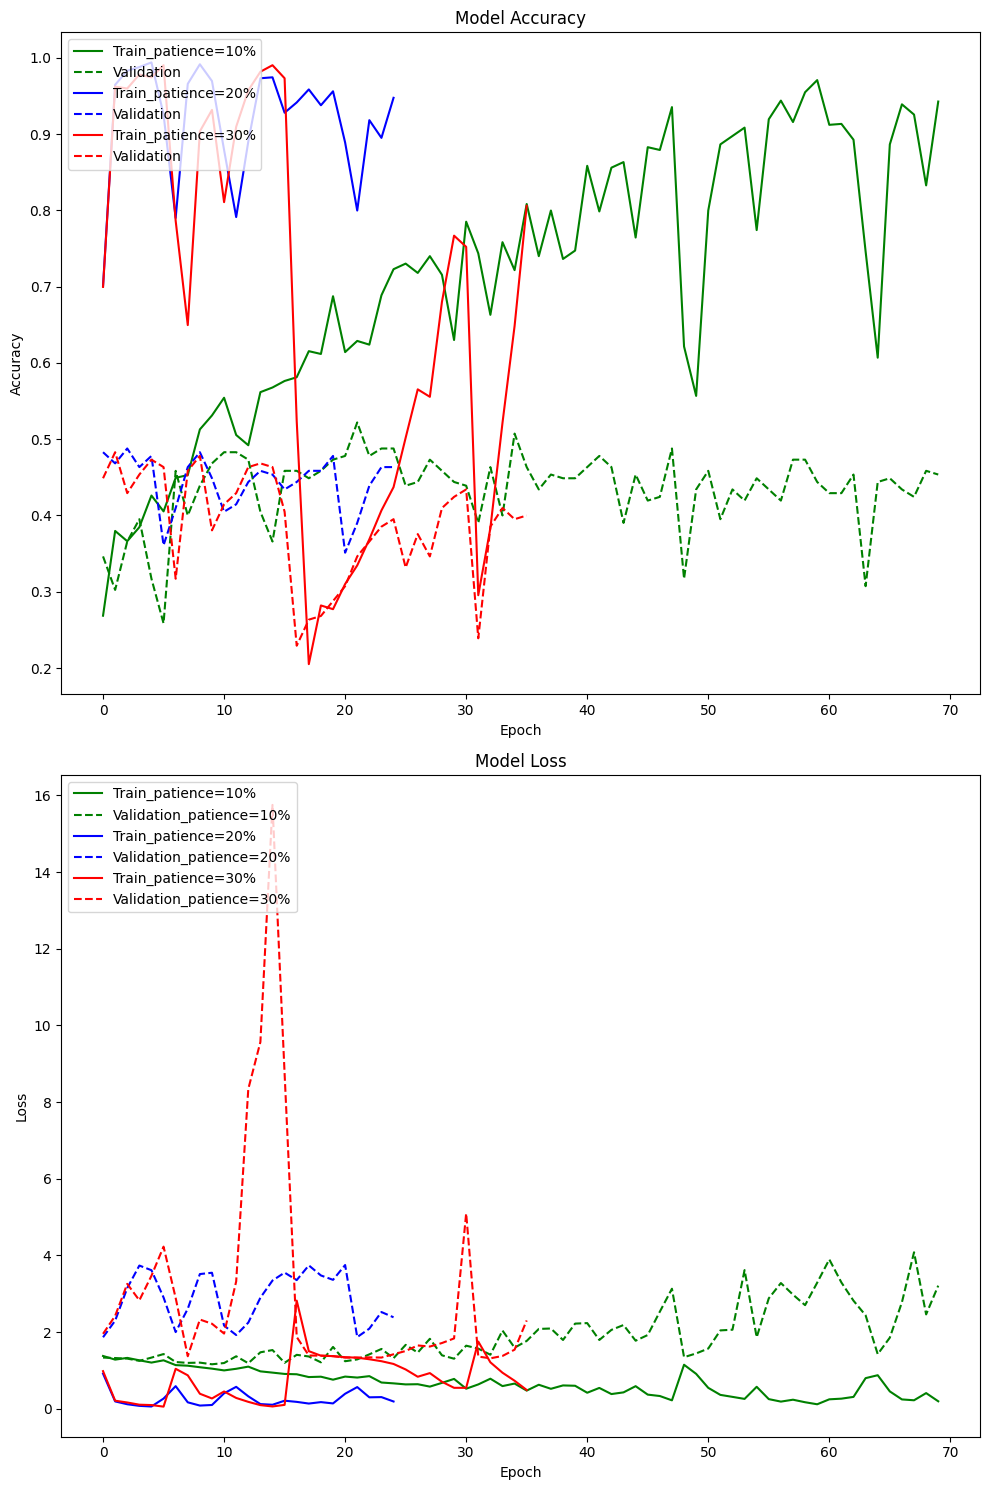

In [13]:
# Early Stopping
history_early_stopping = {}
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(4, activation="softmax"))


# patience=5% of epochs
early_stopping_1 = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=max_epochs*0.1,
    mode='max'
)

history = compile_and_fit(model, early_stopping_1)
history_early_stopping['patience=10%'] = history

plot_history(history, 'green', 'patience=10%')

# patience=20% of epochs
early_stopping_2 = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=max_epochs*0.2,
    mode='max'
)

history = compile_and_fit(model, early_stopping_2)
history_early_stopping['patience=20%'] = history

plot_history(history, 'blue', 'patience=20%')

# patience=30% of epochs
early_stopping_3 = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=max_epochs*0.3,
    mode='max'
)

history = compile_and_fit(model, early_stopping_3)
history_early_stopping['patience=30%'] = history

plot_history(history, 'red', 'patience=30%')

plt.tight_layout()
plt.show()

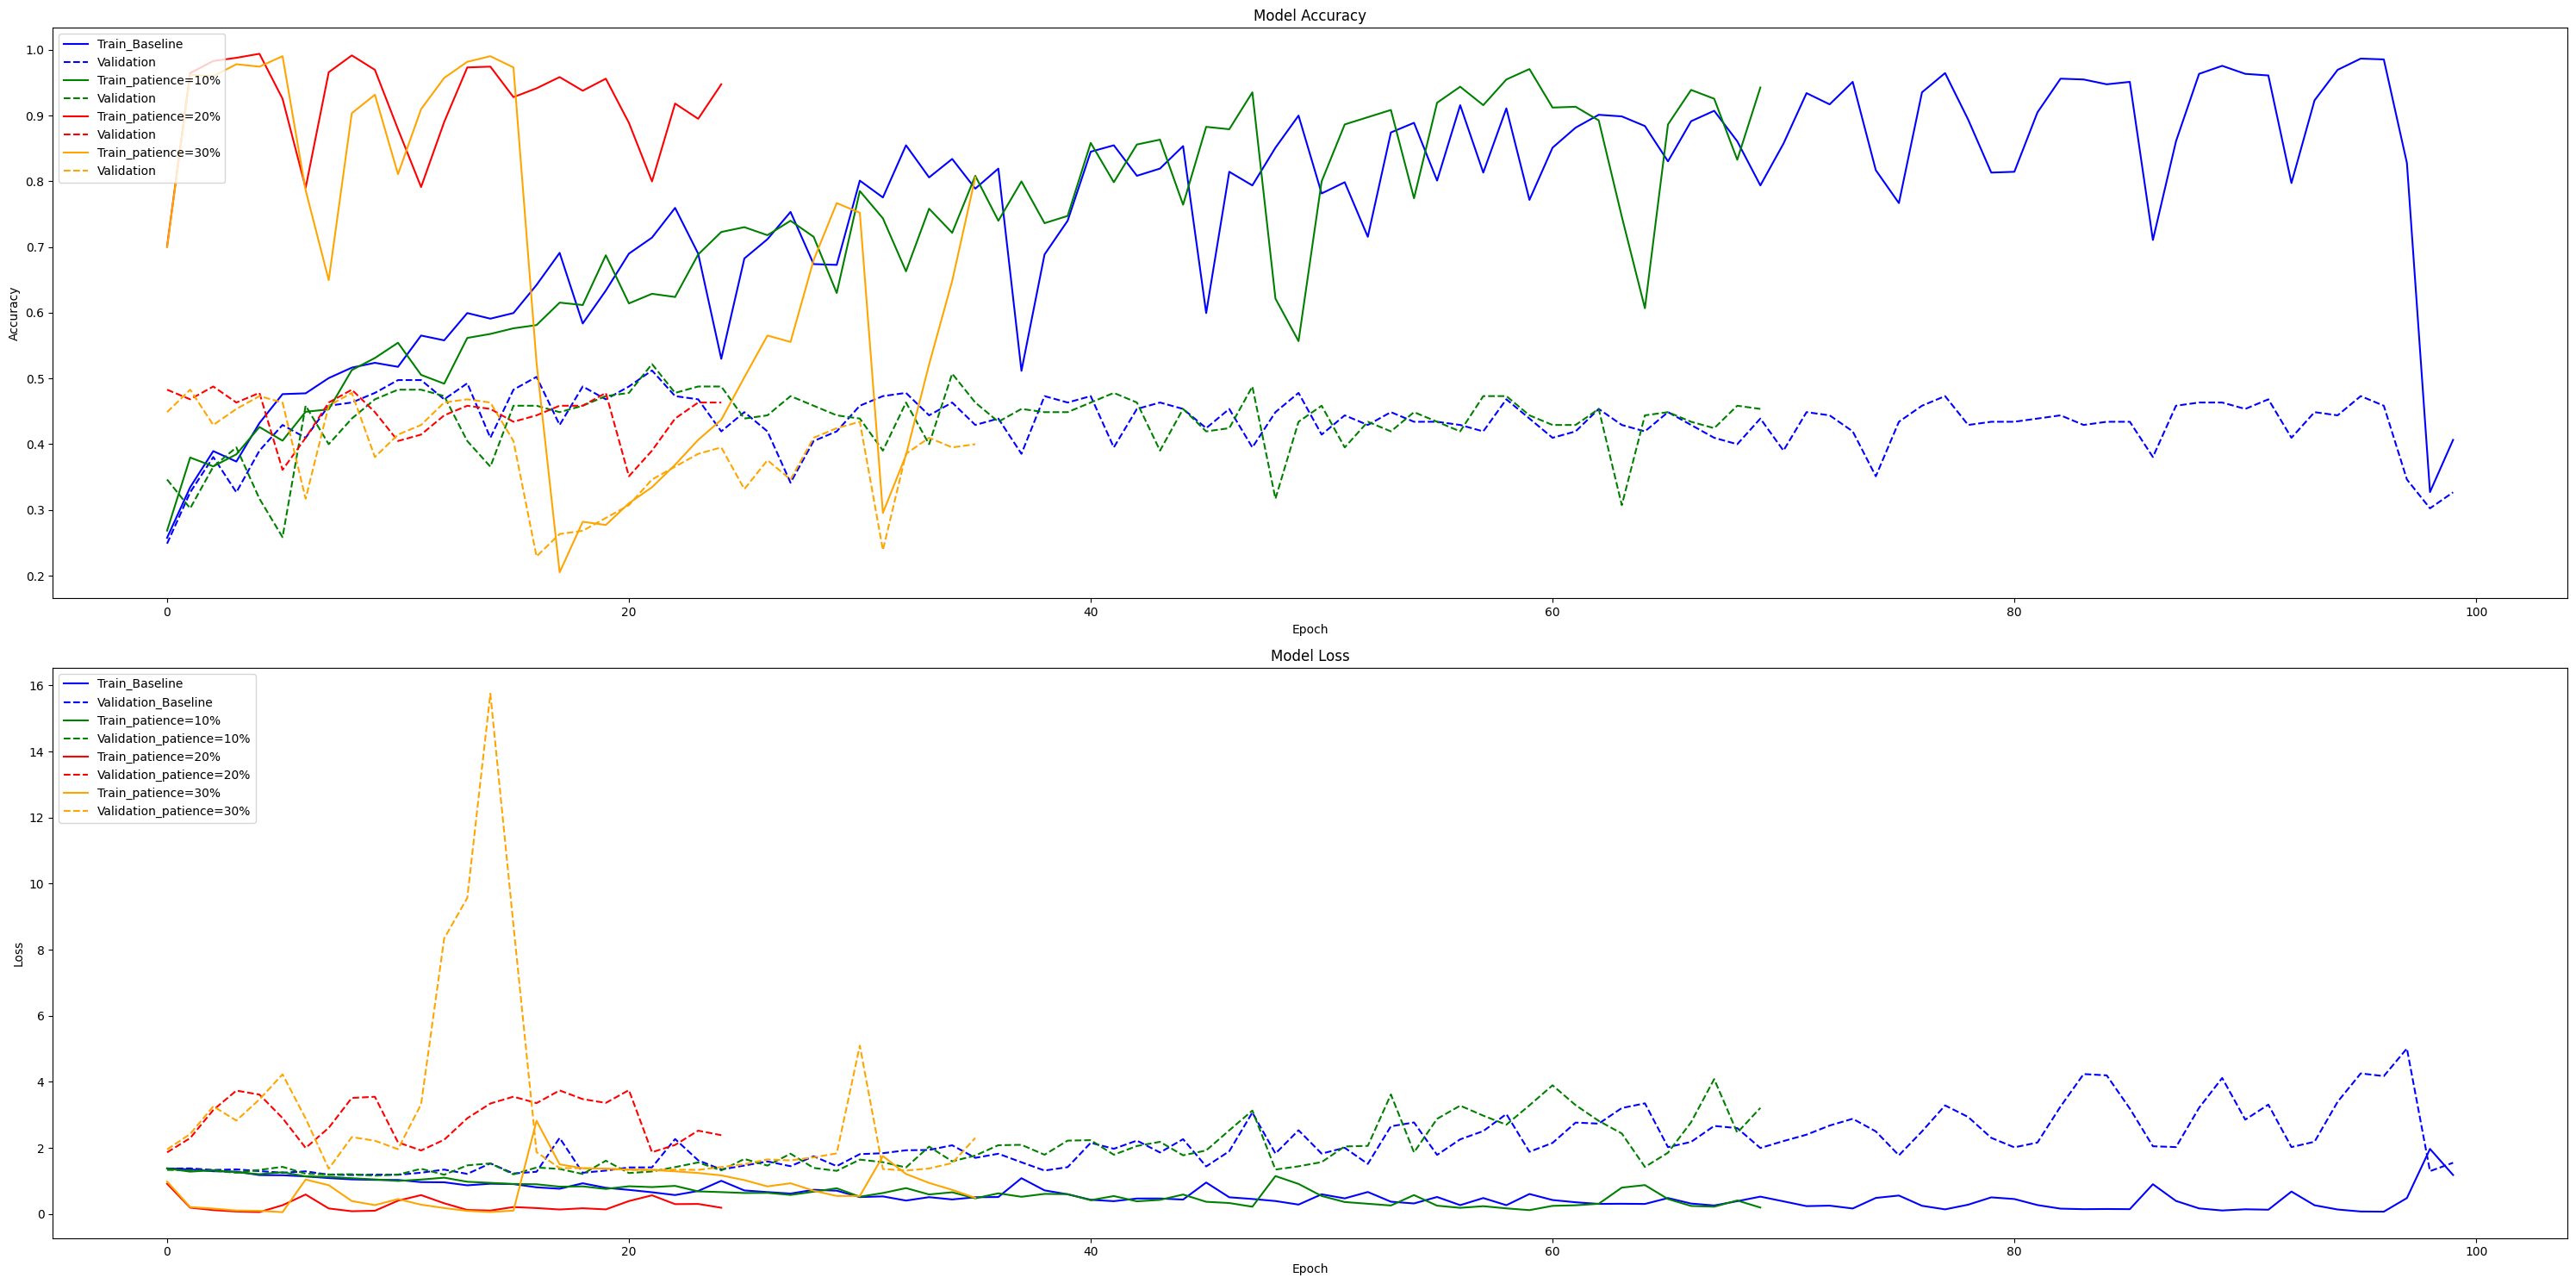

Improvement of patience=20% against the baseline: 13.658538460731506


In [19]:
# Early Stopping against the benchmark

fig, axs = plt.subplots(2, 1, figsize=(30, 15))

plot_history(histories['baseline'], 'blue', 'Baseline')
plot_history(history_early_stopping['patience=10%'], 'green', 'patience=10%')
plot_history(history_early_stopping['patience=20%'], 'red', 'patience=20%')
plot_history(history_early_stopping['patience=30%'], 'orange', 'patience=30%')

plt.tight_layout()
plt.show()

histories["early.stopping"] = history_early_stopping['patience=20%']
print("Improvement of patience=20% against the baseline:", calculate_improvement(history_early_stopping['patience=20%'], histories['baseline']))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 196608)            0         
                                                                 
 dense_252 (Dense)           (None, 100)               19660900  
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_253 (Dense)           (None, 100)               10100     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_254 (Dense)           (None, 100)               10100     
                                                                 
 dropout_22 (Dropout)        (None, 100)             

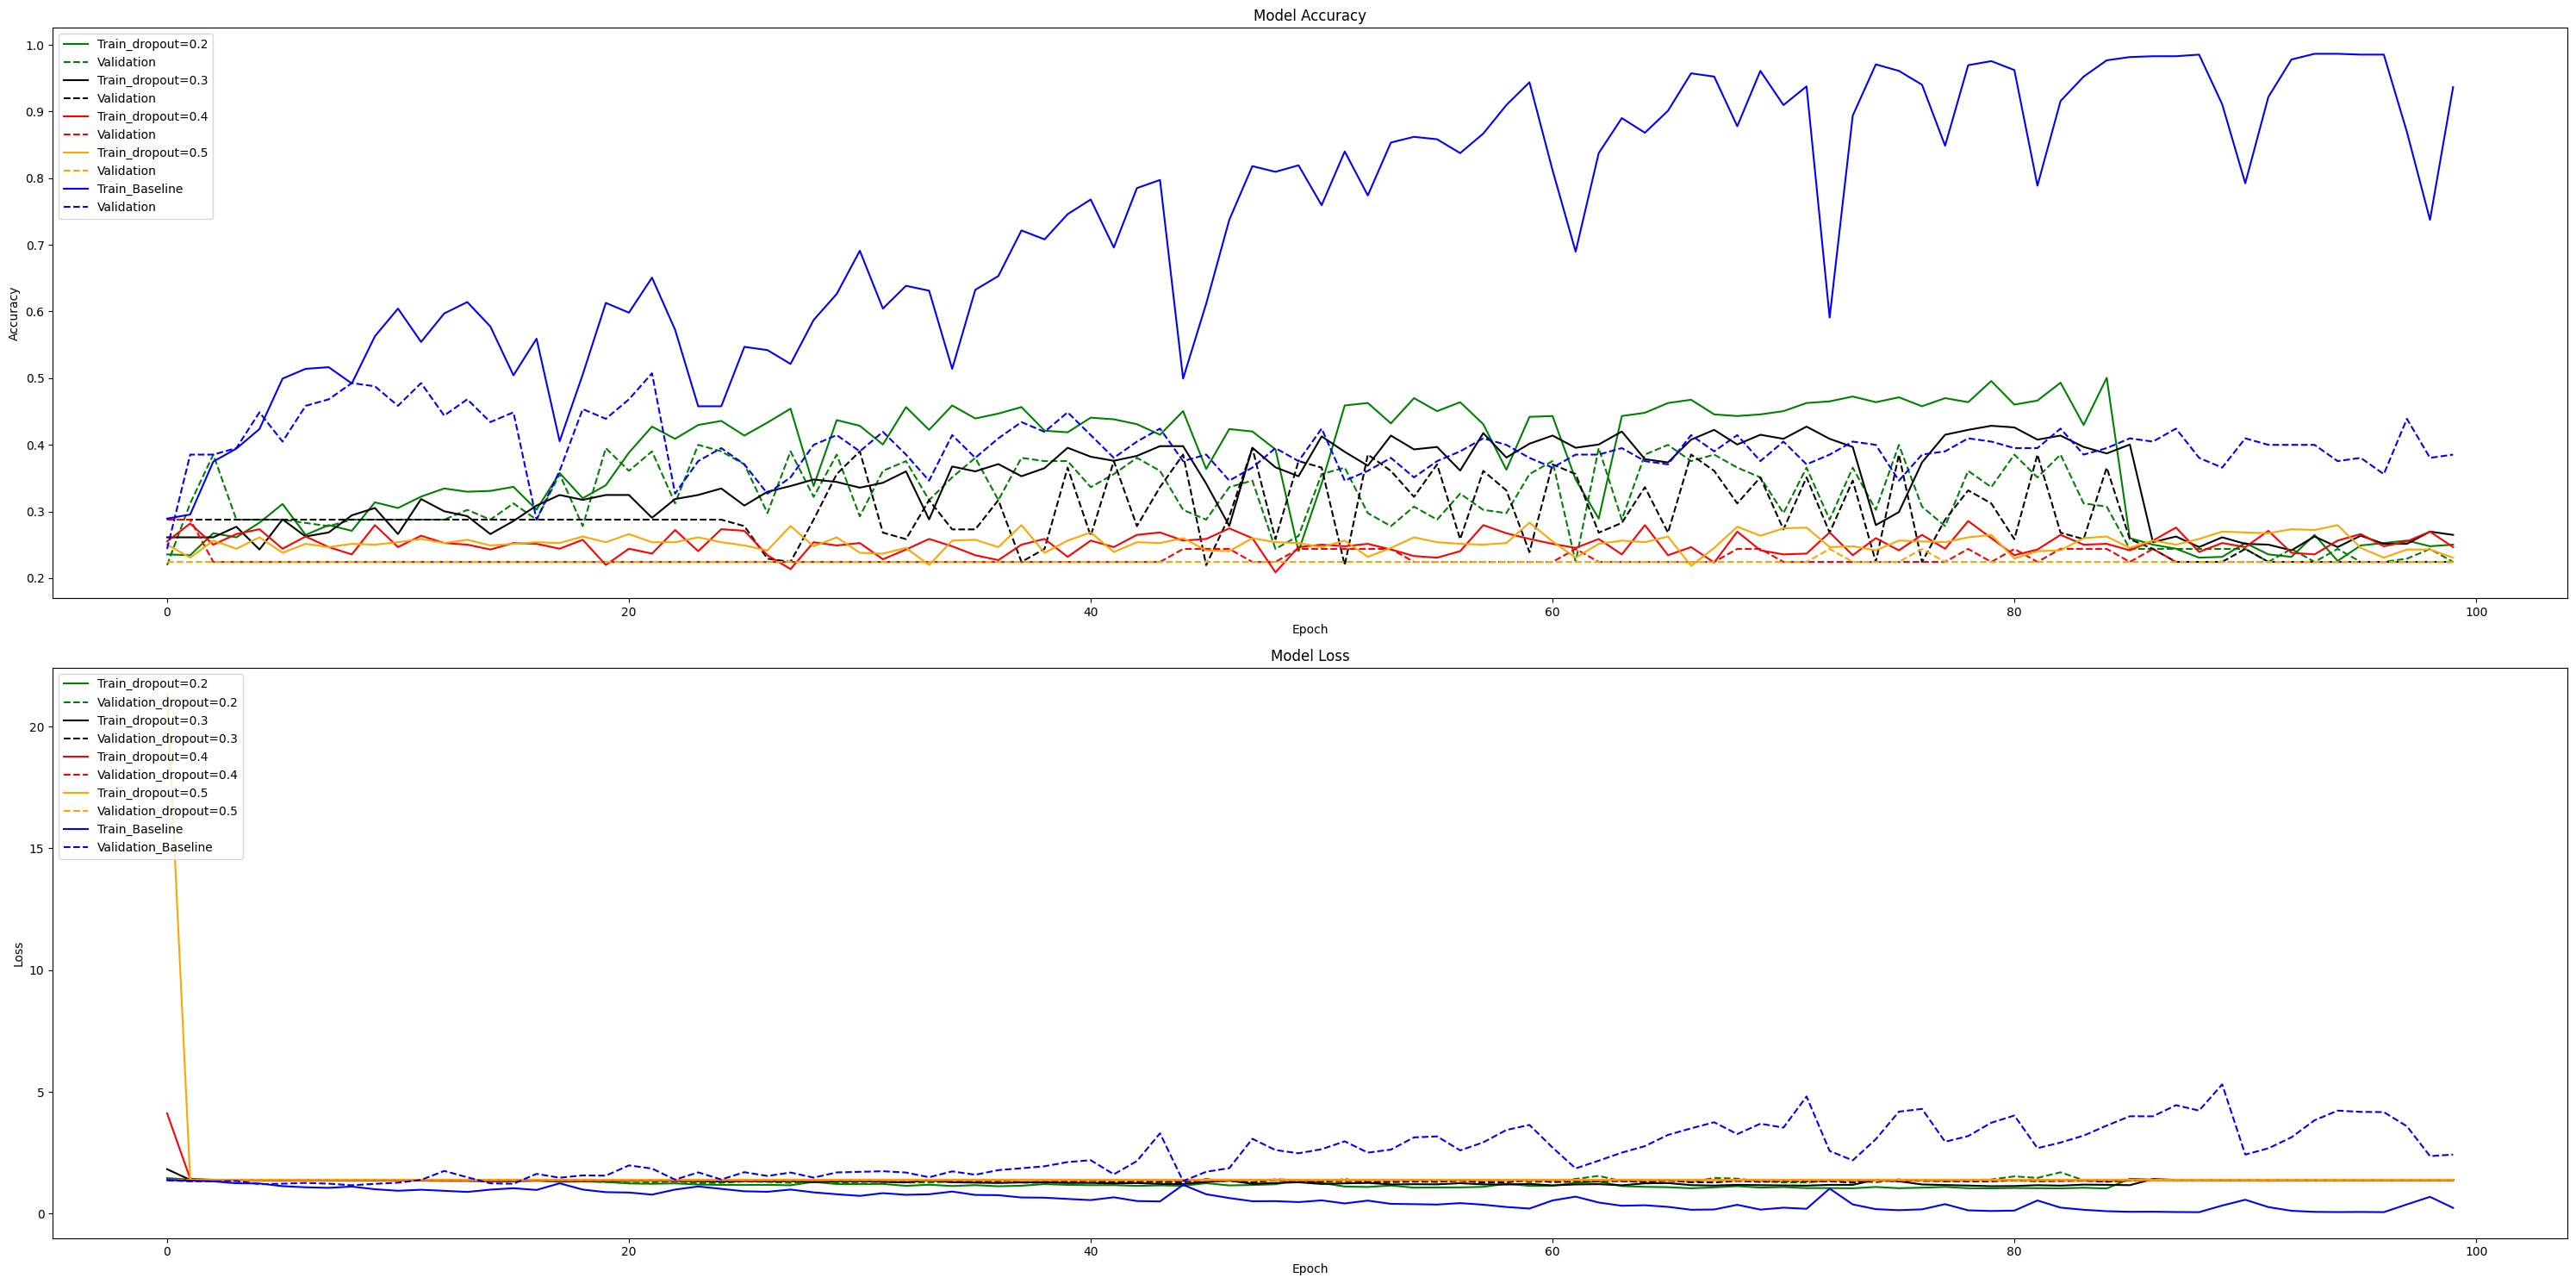

In [ ]:
# Dropout
history_dropout = {}
fig, axs = plt.subplots(2, 1, figsize=(30, 15))

# dropoutrate=0.2

dropout_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    dropout_1.add(keras.layers.Dense(100, activation="relu"))
    dropout_1.add(keras.layers.Dropout(0.2))

dropout_1.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(dropout_1)
history_dropout['dropout=0.2'] = history

plot_history(history, 'green', 'dropout=0.2')

# dropoutrate=0.3

dropout_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    dropout_2.add(keras.layers.Dense(100, activation="relu"))
    dropout_2.add(keras.layers.Dropout(0.3))

dropout_2.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(dropout_2)
history_dropout['dropout=0.3'] = history

plot_history(history, 'black', 'dropout=0.3')

# dropoutrate=0.4

dropout_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    dropout_3.add(keras.layers.Dense(100, activation="relu"))
    dropout_3.add(keras.layers.Dropout(0.4))

dropout_3.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(dropout_3)
history_dropout['dropout=0.4'] = history

plot_history(history, 'red', 'dropout=0.4')

# dropoutrate=0.5

dropout_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    dropout_4.add(keras.layers.Dense(100, activation="relu"))
    dropout_4.add(keras.layers.Dropout(0.5))

dropout_4.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(dropout_4)
history_dropout['dropout=0.5'] = history

plot_history(history, 'orange', 'dropout=0.5')

# add the benchmark
plot_history(histories['baseline'], 'blue', 'Baseline')

plt.tight_layout()
plt.show()

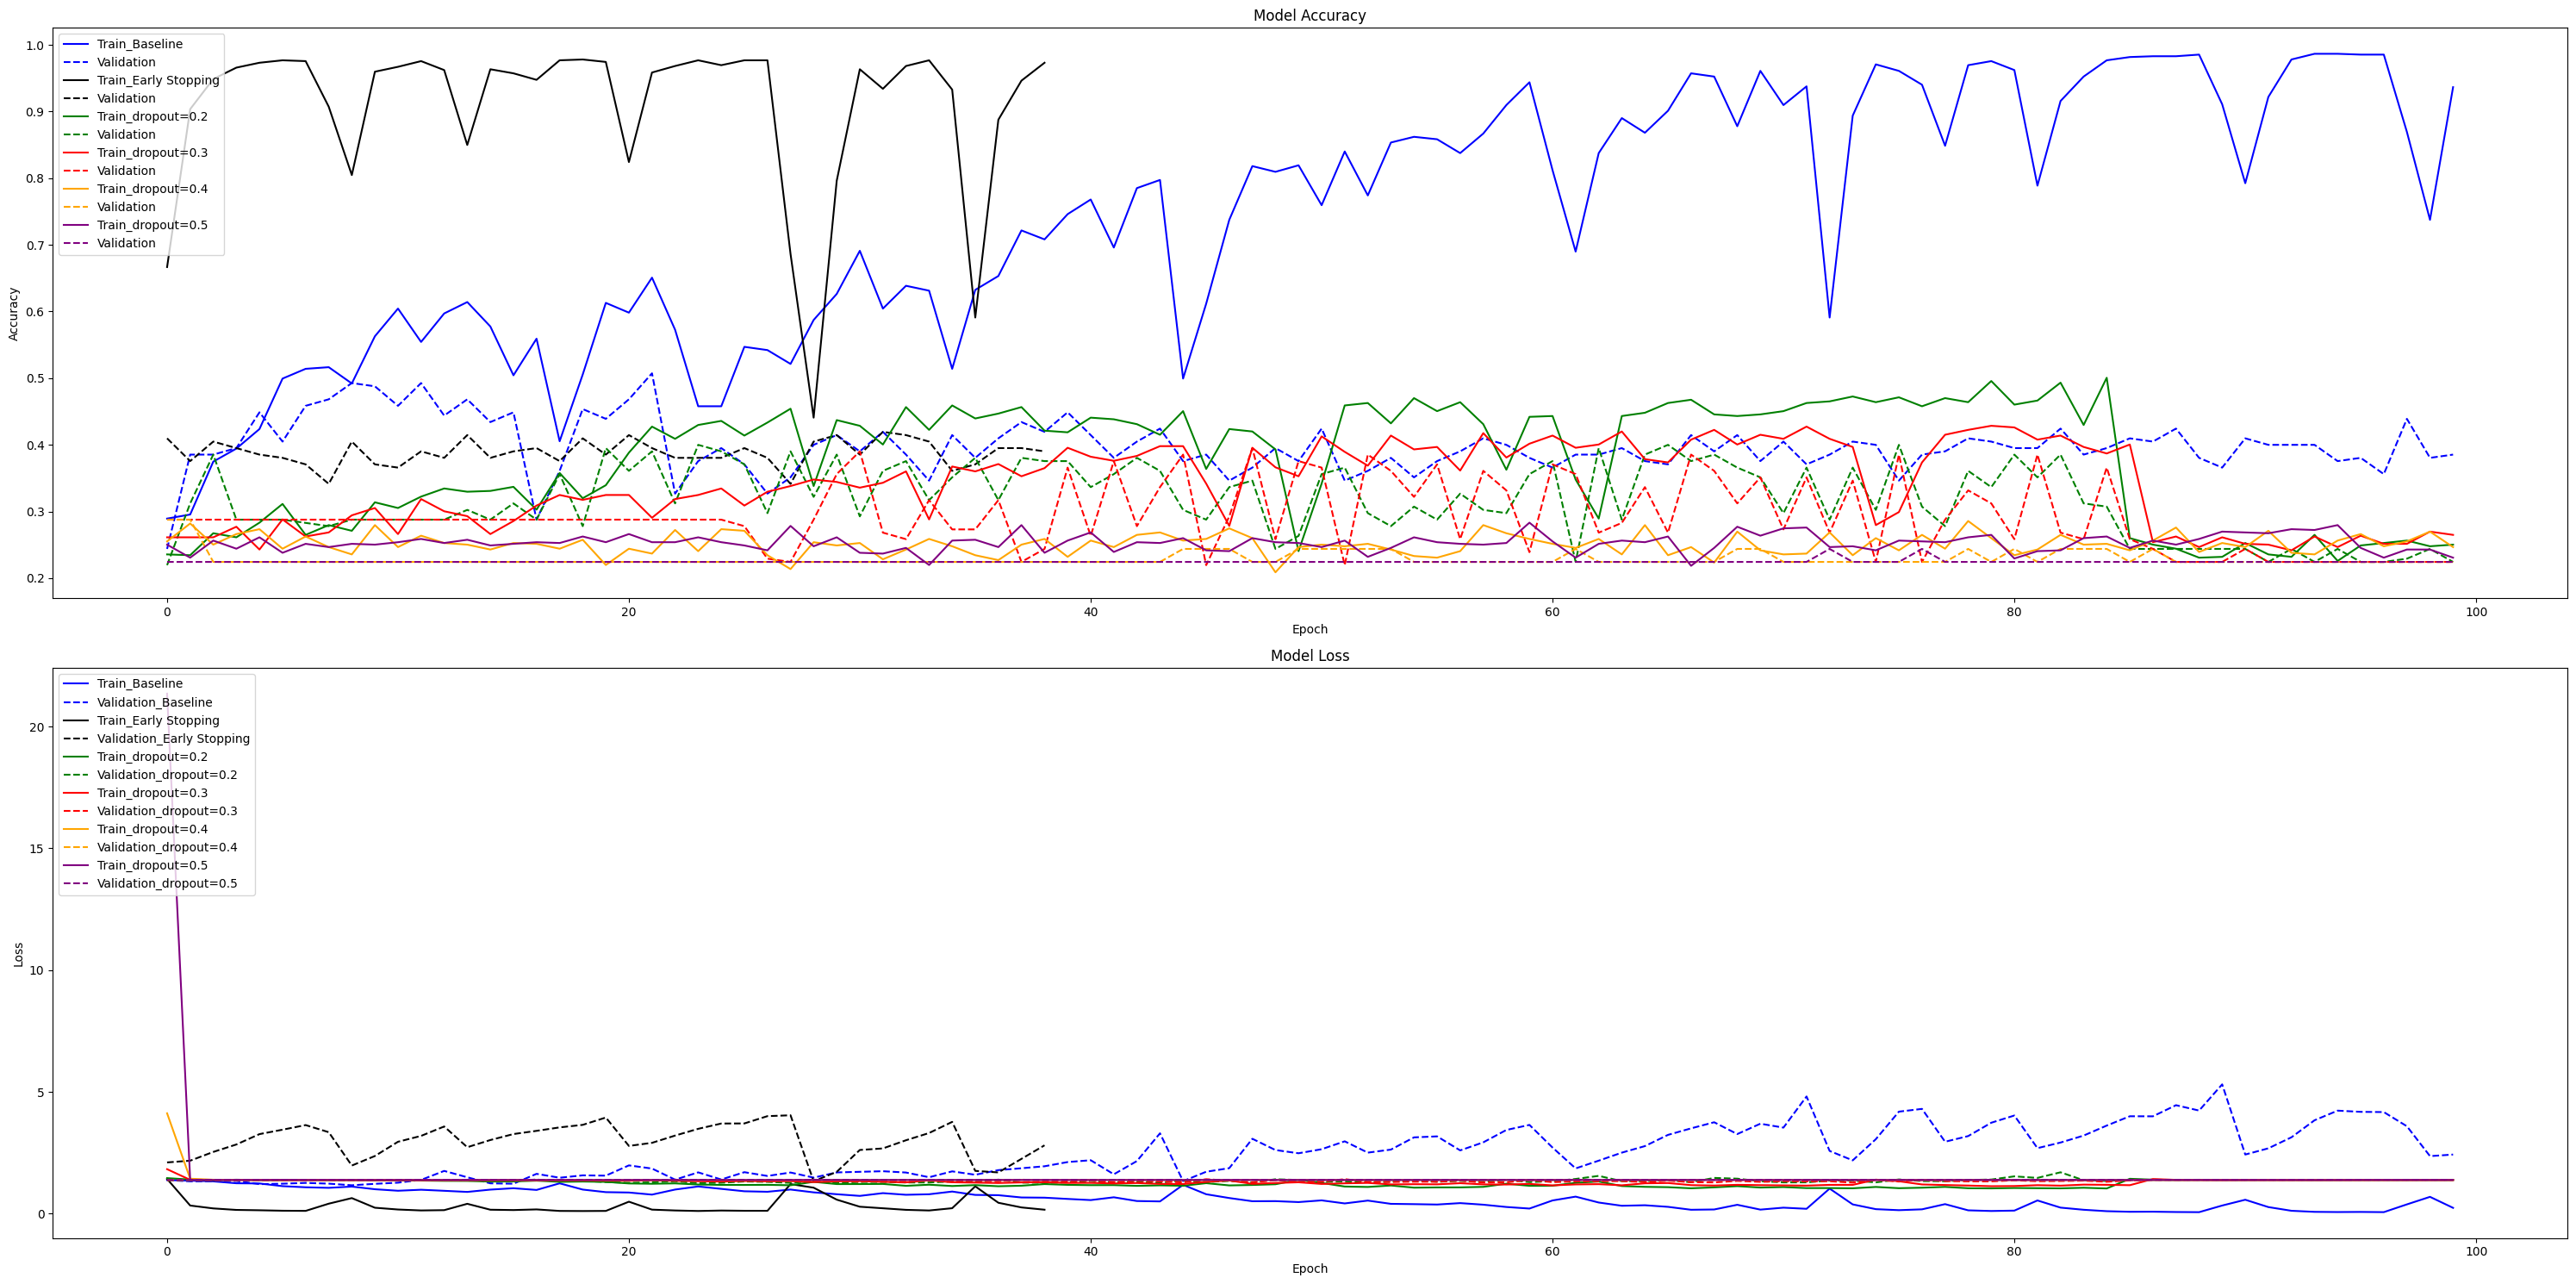

Improvement of dropout=3% against the baseline: -16.09756052494049


In [ ]:
# Dropout against the benchmark and current best model

fig, axs = plt.subplots(2, 1, figsize=(30, 15))

plot_history(histories['baseline'], 'blue', 'Baseline')
plot_history(histories['early.stopping'], 'black', 'Early Stopping')
plot_history(history_dropout['dropout=0.2'], 'green', 'dropout=0.2')
plot_history(history_dropout['dropout=0.3'], 'red', 'dropout=0.3')
plot_history(history_dropout['dropout=0.4'], 'orange', 'dropout=0.4')
plot_history(history_dropout['dropout=0.5'], 'purple', 'dropout=0.5')

plt.tight_layout()
plt.show()

print("Improvement of dropout=3% against the baseline:", calculate_improvement(history_dropout['dropout=0.3'], histories['baseline']))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 batch_normalization (Batch  (None, 196608)            786432    
 Normalization)                                                  
                                                                 
 dense_42 (Dense)            (None, 100)               19660900  
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

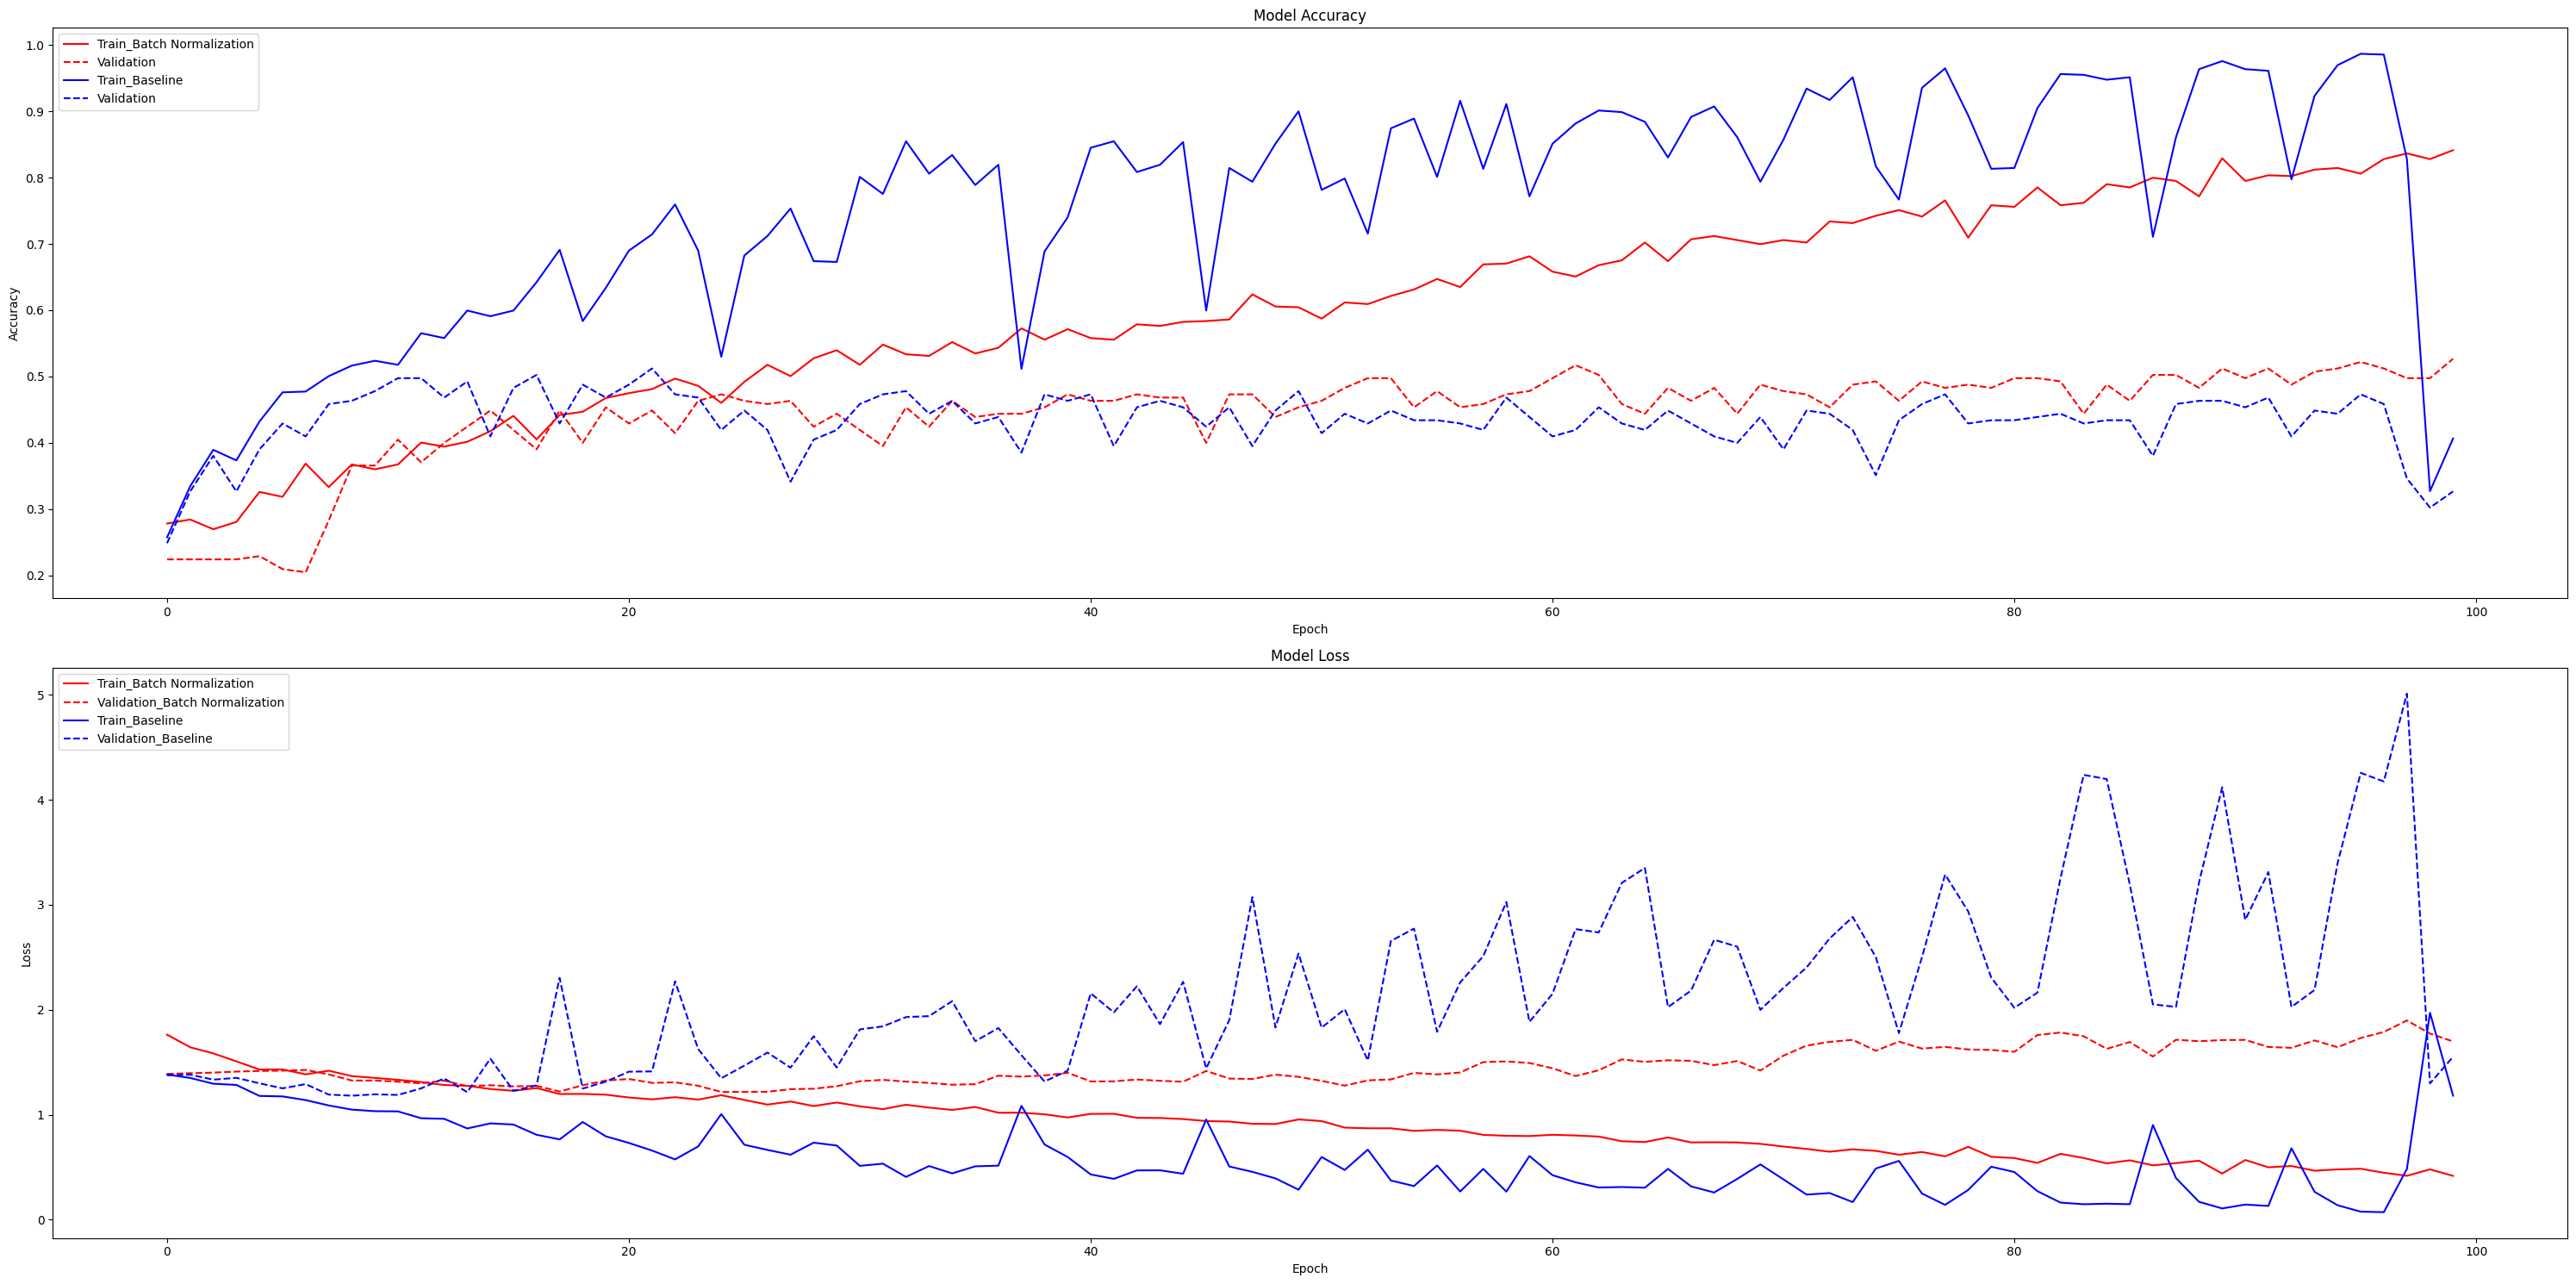

Improvement of Batch Normalization 19.999998807907104


In [15]:
# Batch Normalization

batch = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
  batch.add(keras.layers.BatchNormalization())
  batch.add(keras.layers.Dense(100, activation="relu"))

batch.add(keras.layers.BatchNormalization())
batch.add(keras.layers.Dense(4, activation="softmax"))

history = compile_and_fit(batch)

fig, axs = plt.subplots(2, 1, figsize=(30, 15))
plot_history(history, 'red', 'Batch Normalization')
plot_history(histories['baseline'], 'blue', 'Baseline')

plt.tight_layout()
plt.show()

print("Improvement of Batch Normalization", calculate_improvement(history, histories['baseline']))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 196608)            0         
                                                                 
 batch_normalization_42 (Ba  (None, 196608)            786432    
 tchNormalization)                                               
                                                                 
 dense_84 (Dense)            (None, 100)               19660900  
                                                                 
 batch_normalization_43 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_85 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_44 (Ba  (None, 100)              

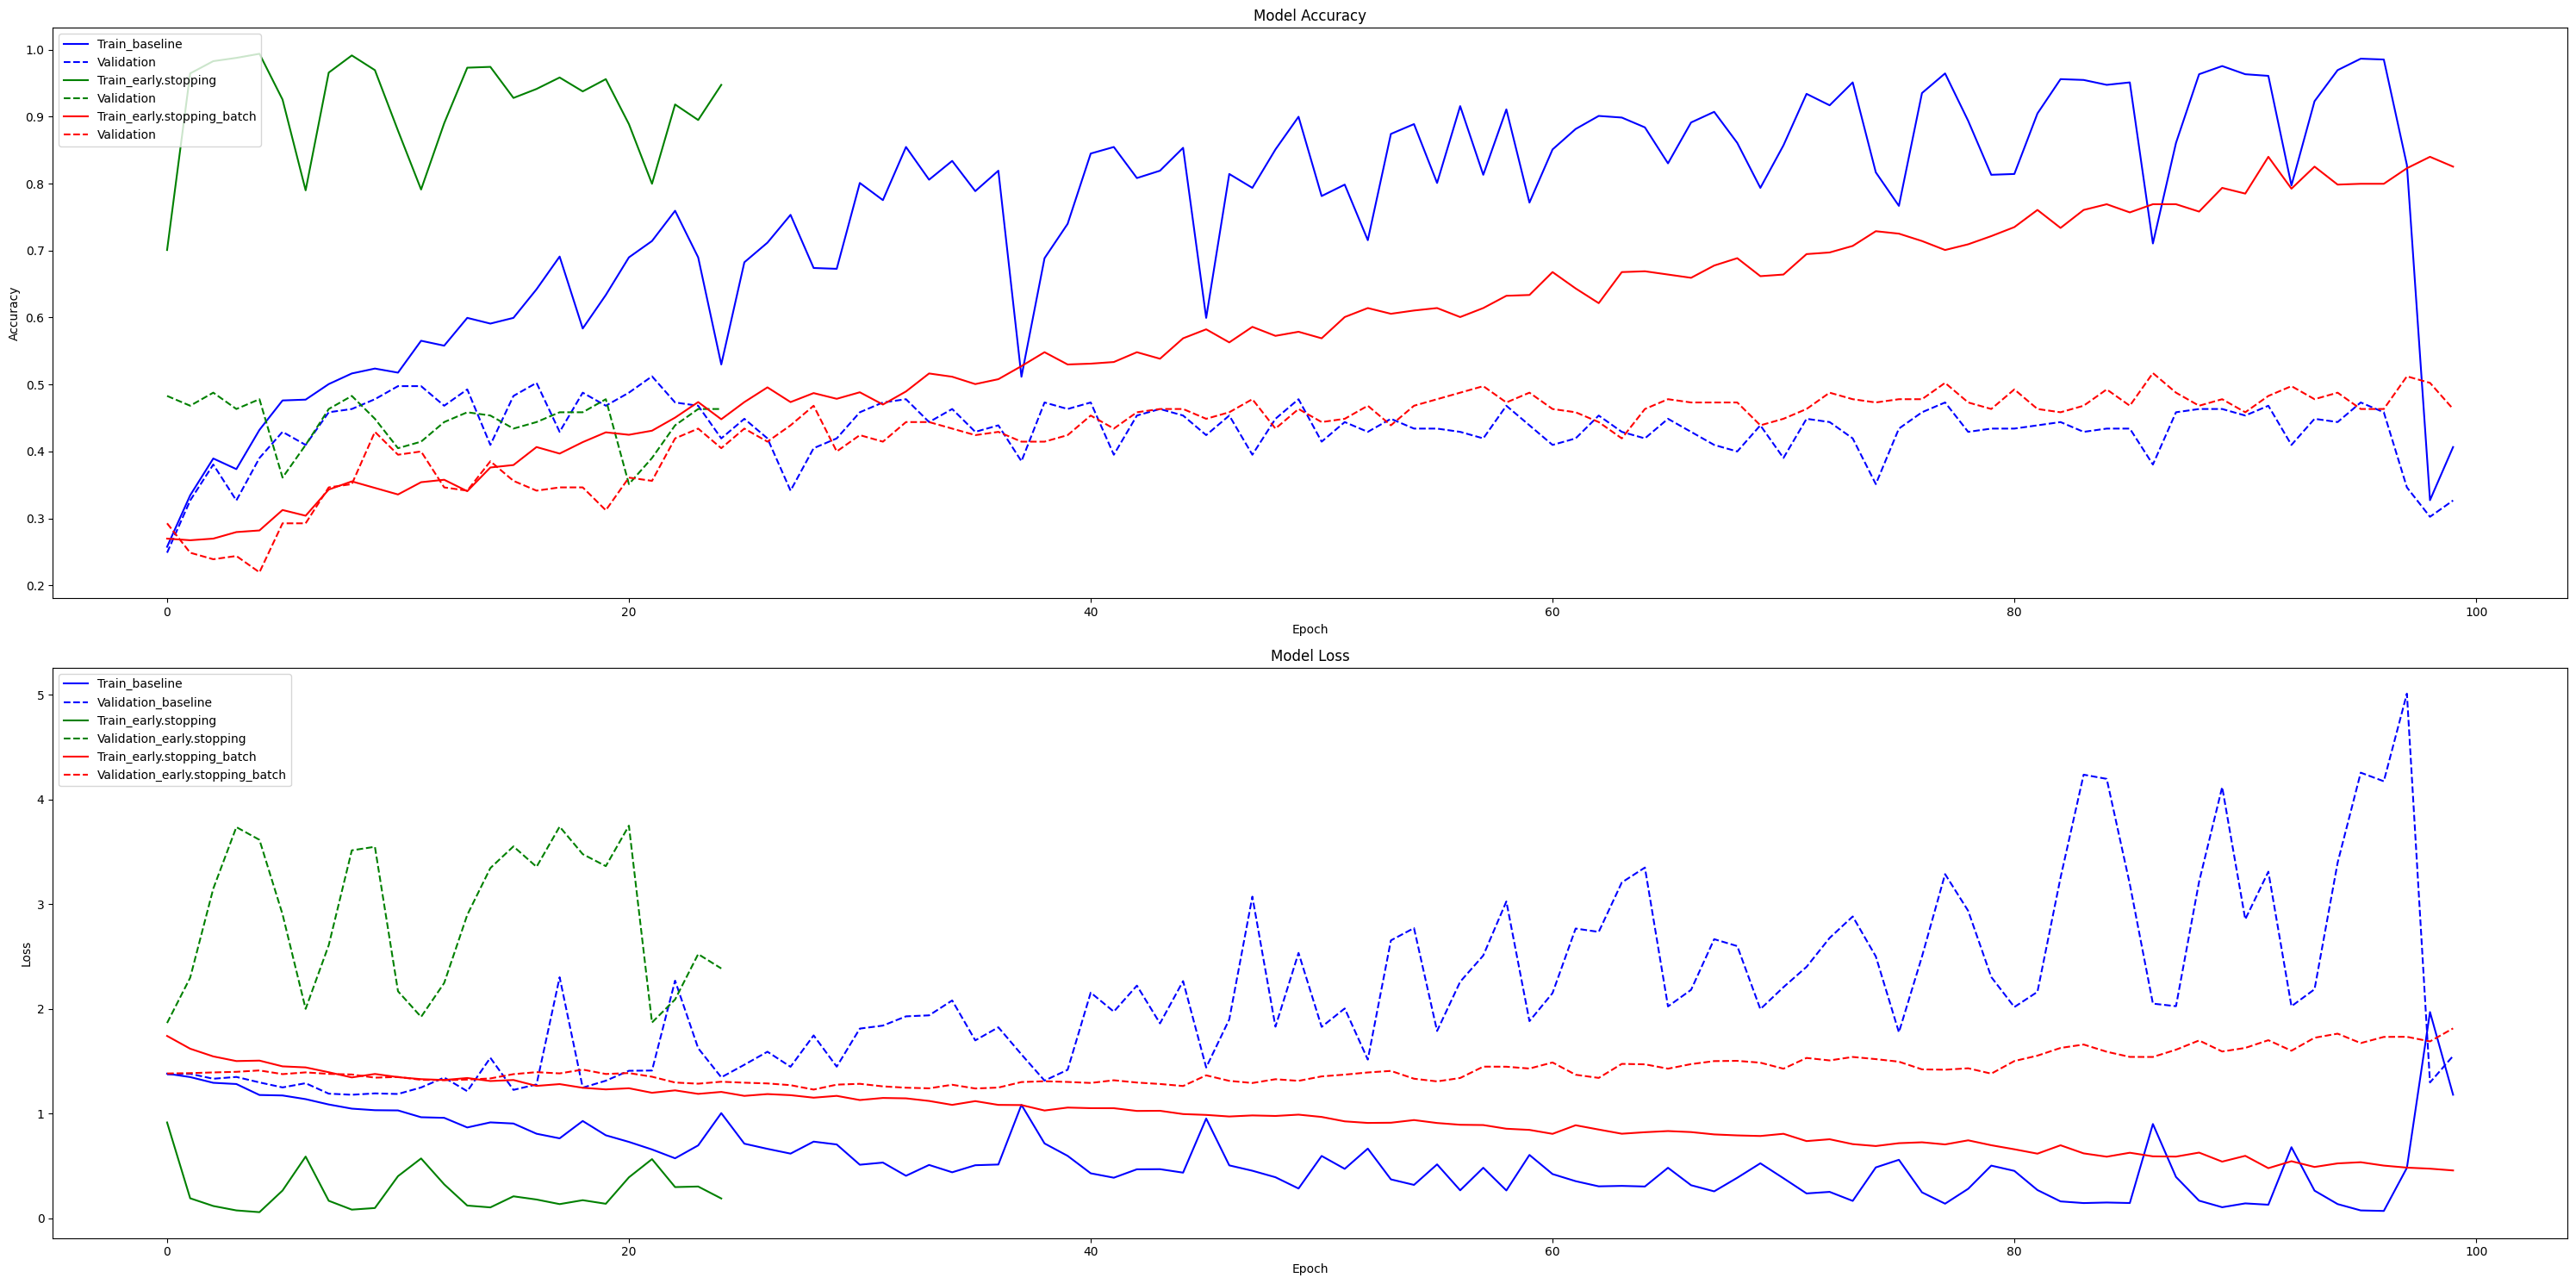

Improvement of early stopping with batch normalization 13.658538460731506


In [21]:
# Adding Batch Normalization to the pipeline

early_batch = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    early_batch.add(keras.layers.BatchNormalization())
    early_batch.add(keras.layers.Dense(100, activation="relu"))

early_batch.add(keras.layers.BatchNormalization())
early_batch.add(keras.layers.Dense(4, activation="softmax"))

early_stopping = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=max_epochs*0.2,
    mode='max'
)

history = compile_and_fit(early_batch, early_stopping)
histories['early.stopping_batch'] = history

fig, axs = plt.subplots(2, 1, figsize=(30, 15))
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
    'white', 'pink', 'lime', 'purple', 'gray', 'brown', 'orange',
    'teal', 'coral', 'navy', 'maroon', 'turquoise', 'violet',
    'gold', 'silver', 'rose', 'azure', 'lavender', 'beige'
]

for i, value in enumerate(histories):
    plot_history(histories[value], colors[i], value)

plt.tight_layout()
plt.show()

print("Improvement of early stopping with batch normalization", calculate_improvement(histories["early.stopping_batch"], histories['baseline']))

In [ ]:
# Extending the early stopping patience

early_batch = keras.models.Sequential([
    keras.layers.Flatten(input_shape=images.shape[1:])])

for i in range(number_dense_layers):
    early_batch.add(keras.layers.BatchNormalization())
    early_batch.add(keras.layers.Dense(100, activation="relu"))

early_batch.add(keras.layers.BatchNormalization())
early_batch.add(keras.layers.Dense(4, activation="softmax"))

early_stopping = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=max_epochs*0.3,
    mode='max'
)

history = compile_and_fit(early_batch, early_stopping)
histories['early.stopping_batch'] = history

fig, axs = plt.subplots(2, 1, figsize=(30, 15))
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
    'white', 'pink', 'lime', 'purple', 'gray', 'brown', 'orange',
    'teal', 'coral', 'navy', 'maroon', 'turquoise', 'violet',
    'gold', 'silver', 'rose', 'azure', 'lavender', 'beige'
]

for i, value in enumerate(histories):
    plot_history(histories[value], colors[i], value)

plt.tight_layout()
plt.show()

print("Improvement of early stopping with batch normalization", calculate_improvement(histories["early.stopping_batch"], histories['baseline']))

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network.

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

---
In the training process, we can observe that the number of epochs chosen was too large, as the model reached the best results in less than 20 epochs. This is partly because when the model was initialized, the training accuracy was already very close to 1. In the end of the training process, a valuation accuracy 51% and a loss of 9.4447 was achieved, so there was a significant improvement from the previous attempts. One thing to note is that the loss function used joins the real loss with the confidence level of predictions, causing the current situation, where both accuracy and loss increase.
The main reason for the increase in accuracy is the fact that convolution layers, together with pooling and the dropout layers included, are able to greatly reduce the information extracted from the input, which produces generalizable models that work well with new data. Not only are the results better, but the model is simpler and faster to train and to use for preductions, so overall, CNNs are far superior than multi-layer perceptrons for classification tasks with images.

In [ ]:
# No need for the rescalling layers, since the images were rescalled in the setup (in question 1.1)
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=images.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(3, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 21, 21, 128)      

Epoch 1/100
26/26 [==============================] - 5s 91ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 8.2709 - val_accuracy: 0.5561
Epoch 2/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0120 - accuracy: 0.9988 - val_loss: 7.8694 - val_accuracy: 0.5561
Epoch 3/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0471 - accuracy: 0.9927 - val_loss: 7.8932 - val_accuracy: 0.5268
Epoch 4/100
26/26 [==============================] - 2s 67ms/step - loss: 0.0436 - accuracy: 0.9951 - val_loss: 7.7450 - val_accuracy: 0.5659
Epoch 5/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0183 - accuracy: 0.9915 - val_loss: 8.3650 - val_accuracy: 0.5268
Epoch 6/100
26/26 [==============================] - 2s 81ms/step - loss: 0.0336 - accuracy: 0.9951 - val_loss: 7.0978 - val_accuracy: 0.5561
Epoch 7/100
26/26 [==============================] - 2s 76ms/step - loss: 0.0098 - accuracy: 0.9976 - val_loss: 6.9650 - val_accuracy: 0.5561
Epoch 

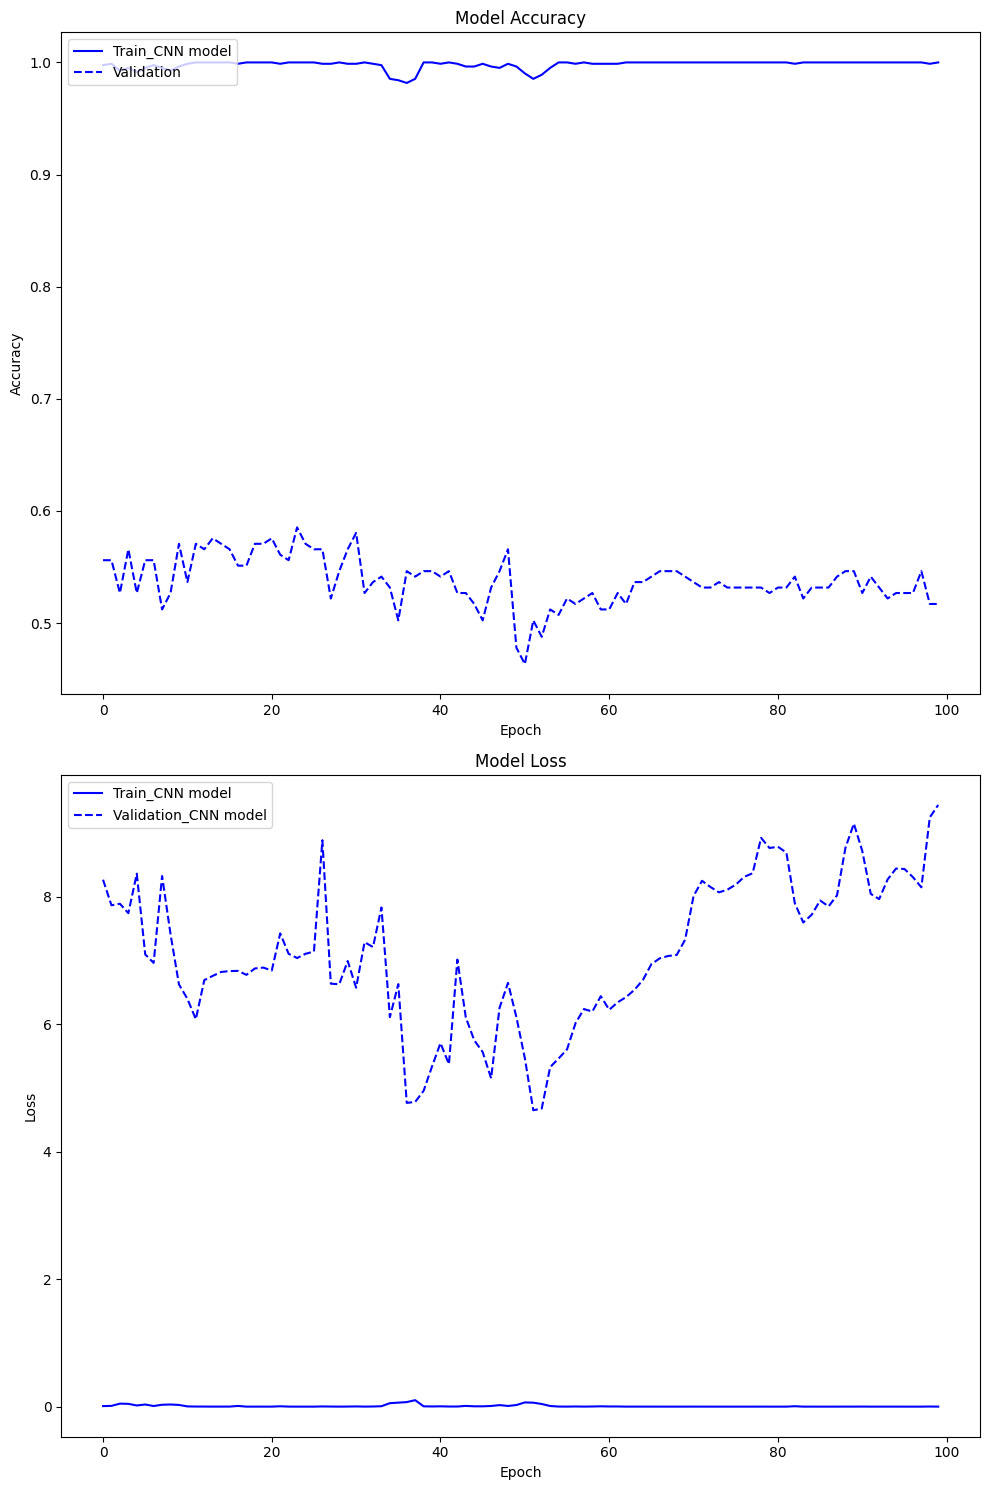

In [ ]:
# Assumed that we should compile and train the model with adam optimizer. Epochs were reduced to 15, since the model did not show greate improvements when trained for more epochs
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_model.fit(X_train, y_train, epochs=max_epochs,
                    validation_data=(X_test, y_test))

fig, axs = plt.subplots(2, 1, figsize=(10, 15))

plot_history(history, "blue", "CNN model")

plt.tight_layout()
plt.show()

### Question 1.4 Transfer learning (35 points)

In this question, we will use the several well-known architectures that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, these architectures have already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks.

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of model, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained models from `tensorflow.keras.applications`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below:

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures.

Try to use the following models: VGG16, Inception, ResNet, MobileNet and EfficientNet and compare their performance and running time. Explain which model would work the best.

---
Results:
Looking at the plots and at the model training evolution, we can see that accuracy values of the transfer learning models are very good in comparison with previous architectures, reaching accuracies ranging from 80 to 90%, and losses of only 2 to 3. The only exception wwas efficient net, but after consulting documentation online, it is because the model includes rescaling layers and expectes inputs ranging from 0 to 256.

Transfer learning models were able to far outperform the previous architectures, because they were optimized for with very large data sets to be able to work in lots of classification tasks. Looking at our dataset, there is a great diversity of situations in the images that the labels alone cannot teach the model, so using a pre-trained model with optimized weights, and adding a few layers to adapt the model to our specific task, is the best approach.

In [23]:
def load_model(model_name, input_shape=images.shape[1:]):
    """
    Load a pre-trained model from keras.applications dynamically.

    Parameters:
    - model_name (str): Name of the model to load, e.g., 'VGG16', 'ResNet50', 'InceptionV3', 'MobileNet', 'EfficientNetB0'.
    - input_shape (tuple): The shape of the input data (height, width, channels). In our case, the default will be 256x256x3

    Returns:
    - model: The loaded Keras model with ImageNet weights without the top fully-connected layers.
    """

    Model = getattr(tf.keras.applications, model_name)  # used getattr to retrive the function based on the model name

    model = Model(include_top=False, weights='imagenet', input_shape=input_shape)
    return model

# testing load_model
model_test = load_model("InceptionV3")
model_test.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_63 (Ba  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 tchNormalization)                                                                                
                                                                                                  
 activation (Activatio

In [24]:
# Due to the syntax of the question, it was assumed that seperate functions were required (even though this could be joined with the previous function)
def lock_model(model):
    """
    Lock the loaded model's layers to prevent training. Prints the summary, where
    we can confirm that all parameters are non-trainable
    """
    model.trainable = False
    model.summary()
    return model

lock_model(model_test)

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_63 (Ba  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 tchNormalization)                                                                                
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [25]:
# The question does not specify, so it was assumed that relu activation function and second dense layer with 100 neurons is appropriate
# For training and compiling, it was also assumed that adam optimizer and 100 epochs would be used to be consistent with other models trained
def add_layers(base_model):
    model = keras.Sequential([
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])
    return model

In [ ]:
# Model Training
# For the model architectures that have various versions in the keras documentation webpage, priority was given to the models that had better accuracy, or slightly lower accuracy but way less parameters
# (unless documentation specifies any benefits for image classification tasks)
import time
training_times = {"VGG16": None, "InceptionV3": None, "ResNet50V2": None, "MobileNetV2": None, "EfficientNetB0": None}
history_transfer = {}

for model_name in training_times.keys():
    print("*" * 150 + f"\n{model_name}")
    model = load_model(model_name)
    model_locked = lock_model(model)
    model_final = add_layers(model_locked)

    start_time = time.time()
    history = compile_and_fit(model_final) # the function also includes compiling, so the final training duration is boosted by this extra step, but the goal is to compare models so the difference should be negligible
    training_times[model_name] = time.time() - start_time
    history_transfer[model_name] = history

******************************************************************************************************************************************************
VGG16
58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                     

******************************************************************************************************************************************************
MobileNetV2
9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                               

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(30, 15))

for i, value in enumerate(history_transfer):
    plot_history(history_transfer[value], colors[i], value)

plt.tight_layout()
plt.show()

In [ ]:
# Fixing EfficientNetB0 input (according to documentation, it expects inputs in the [0-255] range)
X_train_efficient = X_train * 255
X_test_efficient = X_test * 255

model = load_model(model_name)
model_locked = lock_model(model)
model_final = add_layers(model_locked)

start_time = time.time()
model_final.compile(optimizer="adam",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

history = model.fit(
    X_train_efficient, y_train,
    epochs=max_epochs,
    validation_data=(X_test_efficient, y_test))

training_times[model_name] = time.time() - start_time
history_transfer[model_name] = history


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(30, 15))

for i, value in enumerate(history_transfer):
    plot_history(history_transfer[value], colors[i], value)

plt.tight_layout()
plt.show()